# <center><font color=|green|>Assignment 2 - Transient Conduction</font></center>
Solve the following problem and explain your results.

# <center><font color=|blue|>Problem 1 - Transient Conduction in a Plane Wall</font></center>

The problem we consider is that of a plane wall initially at 100$^\circ$C with its outer surfaces exposed to an ambient temperature of 0$^\circ$C.  The wall has a thickness 2*L* and may be considered to have an infinite height and a unit depth. The domain is shown schematically below:

![PlaneWall](2-PlaneWall.png)

Initially, the wall only feels the effect of the ambient air very near the surface and thus, the temperature profile inside the solid is quite steep in the vicinity of the surface.  An analytical solution for this problem involves several (at least 4) terms of a Fourier series.  After some time, however, the influence of the ambient air will have reached the center of the wall and the analytical solution can be approximated by the first term of the Fourier series (see, for example, *Fundamentals of Heat and Mass Transfer* by Incropera et al.). To study the order of accuracy of the fully implicit first and second order time discretization schemes, we will consider the cooling process during a period past the initial transient where the one-term Fourier solution is valid.

The parameters for the problem are:

$$ Bi = \frac{h L}{k}= 1.0 $$

$$ T_i = 100^\circ C $$

$$ T_{\infty}= 0^\circ C $$

The one-term Fourier solution for this problem is:

$$
\frac{T-T_{\infty}}{T_i-T_{\infty}}=C_1 \exp\left(-\zeta^2\frac{\alpha t}{L^2}\right)\cos\left(\zeta \frac{x}{L}\right)
$$

where:

$$ T = T(x,t) $$

$$ \alpha = \frac{k}{\rho c_p} $$

$$ C_1 = 1.1191 $$

$$ \zeta = 0.8603 $$

The solution to this problem at the two different dimensionless time levels of interest is:

$$ \text{at } \frac{\alpha t_1}{L^2}= 0.4535,~~~ T(0,t_1)= 80^\circ C $$

$$ \text{at } \frac{\alpha t_2}{L^2}= 3.2632,~~~ T(0,t_2)= 10^\circ C $$

To solve this problem, initialize the temperature field using the analytical solution at $\alpha t_1/L^2 = 0.4535$. This avoids the need for a very small timestep during the initial transient when solution is changing rapidly. Then, use your code to calculate the temporal variation of the temperature field over the time period described above.  Solve the problem by employing 2, 4, 8, 16, and 32 time steps using both the first and second order implicit schemes.

At the end of each run, calculate the absolute average error, $\overline{e}$, using the formula:

$$
\overline{e}= \frac{1}{N_{CV}} \sum_{i=1}^{N_{CV}} |e(i)|
$$

where

$$ e(i) = T_{exact}(i) - T(i) $$ 

Then, for each scheme, plot your results of $\overline{e}$ vs. $\Delta t$ (on a log-log scale) and find the value of $p$ in the expression:

$$
\overline{e}= c (\Delta t)^p
$$

where $p$ represents the order accuracy of the transient scheme. Also show a separate plot of T(0,$t_2$) verses the number of timesteps used for each scheme employed.

Repeat this problem on at least three different grids to demonstrate grid independence of the solution.

**Bonus**: Solve the same problem using the Crank-Nicolson scheme and compare the results.


# <center><font color=|blue|>Solution</font></center>

## Statement of the Problem

In this problem, a plane wall is taken into consideration which has a thickness of 2L, infinite height and unit depth. The initial temperature of the wall is 100$^\circ$C. As it is exposed to an ambient temperature of 0$^\circ$C so heat is transferred from wall to the ambient. This cooling process is assumed to take place during a period past the initial transient where the one-term Fourier solution is valid. The fully implicit first and second order time discretization schemes will be applied to solve the problem using 2, 4, 8, 16, and 32 time steps.

Note that all the individual graphs are summarized in comparative graphs at the end and hence all explanations are added at the end along with those summarized graphs.

## Assumptions

1.	In the beginning, the wall only feels the effect of the ambient air very near the surface.
2.	With the passage of time, the influence of ambient air will reach the centre of the wall.
3.	The cooling process during a period past the initial transient is considered, so that one-term Fourier solution can be applied.


## List of Parameters

Parameters along with their values are given below


Parameters          | Valiue                     | Remarks
:----------:        | :------------------------: |:------------------------:
h                   | 1 [W/m$^2\cdot$K]          |Assumed for simplicity
L                   | 1 [m]                      |Assumed for simplicity
k                   | 1 [W/m$\cdot$K]            |Assumed for simplicity
$\alpha$            | 1 [m^2/s]                  |Assumed for simplicity
$\rho$              | 1 [kg/m^3]                 |Assumed for simplicity
$c_p $              | 1 [J/kgK]                  |Assumed for simplicity
$B_i $              | 1                          |Given
$T_i $              | 100 [$^\circ$C]            |Given
$T_{\infty}$        | 0 [$^\circ$C]              |Given
$C_1$               | 1.1191                     |Given constant
$\zeta $            | 0.8603                     |Given constant


## Given Conditions

Two conditions at the two different dimensionless time levels are:

$$ \text{at } \frac{\alpha t_1}{L^2}= 0.4535,~~~ T(0,t_1)= 80^\circ C $$

$$ \text{at } \frac{\alpha t_2}{L^2}= 3.2632,~~~ T(0,t_2)= 10^\circ C $$

# <center><font color=|blue|>Analytical Solution</font></center>

Analytically the one-term Fourier solution for this problem is given by:

$$
\frac{T-T_{\infty}}{T_i-T_{\infty}}=C_1 \exp\left(-\zeta^2\frac{\alpha t}{L^2}\right)\cos\left(\zeta \frac{x}{L}\right)
$$

$$ \text{for } \frac{\alpha t_1}{L^2}= 0.4535 $$ and taking the value of the parameters from table and replacing them in the equation and considering temperature as $$T_{ana 1}$$ the equation stands:

$$
\frac{T_{ana 1} - 0}{100 - 0} = 1.1191 \exp\left(-0.8603^2 X  0.4535 \right)\cos\left(0.8603 \frac{x}{1}\right)
$$
Simplifying further gives:
$$
T_{ana 1}  = 111.91 \exp\left(-0.33564 \right)\cos\left(0.8603 x\right)
$$

$$ \text{for } \frac{\alpha t_2}{L^2}= 3.2632 $$ and by replacing the value of the parameters from table and replacing them in the equation and considering temperature as $$T_{ana 2}$$ the equation stands:

$$
\frac{T_{ana 2} - 0}{100 - 0} = 1.1191 \exp\left(-0.8603^2 X  3.2632 \right)\cos\left(0.8603 \frac{x}{1}\right)
$$
Simplifying further gives:
$$
T_{ana 2}  = 111.91 \exp\left(-2.41514 \right)\cos\left(0.8603 x\right)
$$

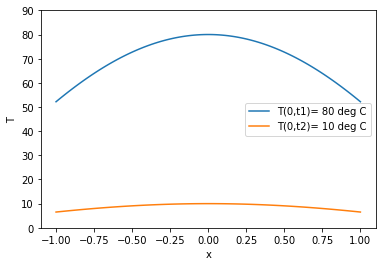

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
x = np.linspace(-1,1,100)

C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
L    = 1
t1   = 0.4535
t2   = 3.2632 

Tana1 = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/L**2))*np.cos(zeta*x/L)
Tana2 = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t2/L**2))*np.cos(zeta*x/L)

import matplotlib.pyplot as plt
plt.plot(x, Tana1 , '-', label='T(0,t1)= 80 deg C')
plt.plot(x, Tana2 , '-', label='T(0,t2)= 10 deg C')
plt.ylabel("T")
plt.xlabel("x")
plt.legend()
plt.ylim(0,90)
plt.show()

From page 284 of Fundamentals of Heat and Mass Transfer by Incropera, the shape of the temperature profile is shown like this 

![tempProfile](tempProfile.png)

which is analogus to the analytical solution presented above.

# <center><font color=|blue|>Numerical Solution</font></center>

For the numerical solution, appropriate boundary conditions will be determined based on the description of the problem. The domain will be divided into a certain number of control volumes and that number of control volumes will be determined through grid independence test. For this test, 32 timesteps will be taken into consideration. The energy equation will be discretized on the domain and solved using first and second order of fully implicit scheme as well as Crank-Nicolson scheme. Then, comparison of the results of the above-mentioned schemes will be presented.

## Boundary Conditions

For the numerical solution of the problem, it is required to set up appropriate boundary conditions. From the analytical temperature profile of the problem, it is observed that the temperature profile is symmetric about the midplane of the wall that means the temperature profile is same from x=0 to x=-L and from x=0 to x=L.

Hence, for numerical solution only the right side of the wall will be taken into consideration which means one boundary will be at x = 0 and the other boundary will be at x = L.      

### At x = 0

At this boundary, temperature at any time will be maximum and hence the temperature gradient will be zero. For this, Neumann boundary condition will be imposed at this boundary.

### At x = L

At this boundary, heat flux is entering in the form of conduction and leaving the boundary in the form of convection. So, Robin boundary condition will be imposed upon this boundary.

## Class Defining a One-Dimensional Cartesian Grid


In finite volume method, it is required to consider a grid on which the equations are discretized for solving any problem. Hence, it is required to define data structure to store the quantities related to grid. These are being used in computational code in addition to calculation of relevant grid parameters. For solving the problem stated above a simple one-dimensional Cartesian grid is taken into consideration.

First to define a grid it is required to introduce class, which includes a method called ``__init__``. It  is commonly known as a *constructor*, as it helps to construct a new object.

The class ``Grid`` takes four arguments, as shown below.

Variable    | Description
:----------:| :------------------------: 
`lx`        | total length of domain in x-direction [m]
`ly`        | total length of domain in y-direction [m]
`lz`        | total length of domain in z-direction [m]
`ncv`       | number of control volumes in domain

[Reference: Taken from the class lecture of Professor DeGroot]

A list of the variables provided by this class is:

Variable    | Description                                         | Array dimension
:----------:| :--------------------------------------------------:|:---------------:
`ncv`       | number of control volumes in domain                 | N/A
`xf`        | array of x locations of face integration points [m] | `ncv+1`
`xP`        | array of x locations of cell centroids [m]          | `ncv+2`
`dx_WP`     | array of distances from W cell to P cell [m]        | `ncv`
`dx_PE`     | array of distances from P cell to E cell [m]        | `ncv`
`Af`        | array of face areas [m$^2$]                         | `ncv+1`
`Aw`        | array of west face areas [m$^2$]                    | `ncv`
`Ae`        | array of east areas [m$^2$]                         | `ncv`
`Ao`        | array of outer surface areas [m$^2$]                | `ncv`
`vol`       | array of cell volumes [m$^3$]                       | `ncv`

[Reference:Taken from the class lecture of Professor DeGroot]


Explanation of Array dimension

`xf   `: generally arrays relating to face-based quantities have dimension `ncv+1` (as this includes the boundary faces)

`Af   `: because of the same reason of previous variable it also has the same dimension i.e., `ncv+1` 

`xP`   : this array has dimension `ncv+2` to account for 'virual cells' located on the boundaries with zero thickness.

Remaining all the variables in the list have dimension equal to `ncv` which is relizable from the basic understanding of grid structure.


In [2]:
import numpy as np

class Grid:
    """Class defining a one-dimensional Cartesian grid"""

    def __init__(self, lx, ly, lz, ncv):
        """Constructor
            lx .... total length of domain in x-direction [m]
            ly .... total length of domain in x-direction [m]
            lz .... total length of domain in x-direction [m]
            ncv ... number of control volumes in domain
        """
        # Store the number of control volumes
        self._ncv = ncv

        # Calculate the control volume length
        dx = lx/float(ncv)

        # Calculate the face locations
        self._xf = np.array([i*dx for i in range(ncv+1)])

        # Calculate the cell centroid locations
        self._xP = np.array([self._xf[0]] +
                            [0.5*(self._xf[i]+self._xf[i+1]) for i in range(ncv)] +
                            [self._xf[-1]])

        # Calculate face areas
        self._Af = ly*lz*np.ones(ncv+1)

        # Calculate the outer surface area for each cell
        self._Ao = (2.0*dx*ly + 2.0*dx*lz)*np.ones(ncv)

        # Calculate cell volumes
        self._vol = dx*ly*lz*np.ones(ncv)

    @property
    def ncv(self):
        """Number of control volumes in domain"""
        return self._ncv

    @property
    def xf(self):
        """Face location array"""
        return self._xf

    @property
    def xP(self):
        """Cell centroid array"""
        return self._xP

    @property
    def dx_WP(self):
        return self.xP[1:-1]-self.xP[0:-2]

    @property
    def dx_PE(self):
        return self.xP[2:]-self.xP[1:-1]

    @property
    def Af(self):
        """Face area array"""
        return self._Af

    @property
    def Aw(self):
        """West face area array"""
        return self._Af[0:-1]

    @property
    def Ae(self):
        """East face area array"""
        return self._Af[1:]

    @property
    def Ao(self):
        """Outer face area array"""
        return self._Ao

    @property
    def vol(self):
        """Cell volume array"""
        return self._vol


## Class Defining the Set of Coefficients

To solve a linear system which is needed to be solved, it is good to define a class that can store the terms related to the linear system. Hence, in the following, a class is defined for the set of coefficients.

In [3]:
import numpy as np

class ScalarCoeffs:
    """Class defining the set of coefficients for a finite-volume discretization
       of a scalar partial differential equation.
    """

    def __init__(self, ncv):
        """Constructor
            ncv ... number of control volumes in domain
        """
        self._ncv = ncv
        self._aP = np.zeros(ncv)
        self._aW = np.zeros(ncv)
        self._aE = np.zeros(ncv)
        self._rP = np.zeros(ncv)

    def zero(self):
        """Function to zero the coefficient arrays"""
        self._aP.fill(0.0)
        self._aW.fill(0.0)
        self._aE.fill(0.0)
        self._rP.fill(0.0)

    def accumulate_aP(self, aP):
        """Function to accumulate values onto aP"""
        self._aP += aP

    def accumulate_aW(self, aW):
        """Function to accumulate values onto aW"""
        self._aW += aW

    def accumulate_aE(self, aE):
        """Function to accumulate values onto aE"""
        self._aE += aE

    def accumulate_rP(self, rP):
        """Function to accumulate values onto rP"""
        self._rP += rP

    @property
    def ncv(self):
        """Number of control volumes in domain"""
        return self._ncv

    @property
    def aP(self):
        """Cell coefficient"""
        return self._aP

    @property
    def aW(self):
        """West cell coefficient"""
        return self._aW

    @property
    def aE(self):
        """East cell coefficient"""
        return self._aE

    @property
    def rP(self):
        """Cell residual"""
        return self._rP


## Classes Defining the Boundary Conditions

For solving any partial differential equation, boundary conditions are needed. There are generally three types of boundary conditions such as "Dirichlet", "Neumann" and "Robin". For, this problem "Neumann" and "Robin" boundary conditions will be required.

### Enumeration Class Defining the Boundary Locations

Now, a special kind of class, called an "enumeration" (abbreviated `Enum` in Python) will be introduced which helps make code more readable.

### Implementation of the Boundary Conditions

While defining classes that deals with applying boundary conditions, having a common interface can make a huge save in effort. In order to take that advantage, each of the member functions (as given below) will be implemented:

- `value()`: gives the calculated boundary value.
- `coeff()`: gives the linearization coefficient for the boundary value, which is equivalent to the derivative of the boundary value with respect to the adjacent cell value
- `apply()`: implements the boundary value to the field variable array that is held as a reference within the class.

In [4]:
from enum import Enum

class BoundaryLocation(Enum):
    """Enumeration class defining boundary condition locations"""
    WEST = 1
    EAST = 2

class NeumannBc:
    """Class defining a Neumann boundary condition"""

    def __init__(self, phi, grid, gradient, loc):
        """Constructor
            phi ........ field variable array
            grid ....... grid
            gradient ... gradient at cell adjacent to boundary
            loc ........ boundary location
        """
        self._phi = phi
        self._grid = grid
        self._gradient = gradient
        self._loc = loc

    def value(self):
        """Return the boundary condition value"""
        if self._loc is BoundaryLocation.WEST:
            return self._phi[1] - self._gradient*self._grid.dx_WP[0]
        elif self._loc is BoundaryLocation.EAST:
            return self._phi[-2] + self._gradient*self._grid.dx_PE[-1]
        else:
            raise ValueError("Unknown boundary location")

    def coeff(self):
        """Return the linearization coefficient"""
        return 1

    def apply(self):
        """Applies the boundary condition in the referenced field variable array"""
        if self._loc is BoundaryLocation.WEST:
            self._phi[0] = self._phi[1] - self._gradient*self._grid.dx_WP[0]
        elif self._loc is BoundaryLocation.EAST:
            self._phi[-1] = self._phi[-2] + self._gradient*self._grid.dx_PE[-1]
        else:
            raise ValueError("Unknown boundary location")
            
class RobinBc:
    """Class defining a Robin boundary condition"""
    
    def __init__(self, phi, Tinf, grid, h, k, loc):
        """Constructor
            phi ........ field variable array
            Tinf........ ambient temperature 
            grid ....... grid
            h........... thermal conductivity
            k........... convection coefficient
            loc ........ boundary location
        """
        self._phi = phi
        self._Tinf = Tinf
        self._grid = grid
        self._h = h
        self._k = k
        self._loc = loc
        
    def value(self):
        """Return the boundary condition value"""
        if self._loc is BoundaryLocation.WEST:
            return (self._phi[1] + ((self._grid.dx_WP[0]*self._h*self._Tinf)/self._k))/(1+((self._grid.dx_WP[0]*self._h)/self._k))
        elif self._loc is BoundaryLocation.EAST:
            return (self._phi[-2] + ((self._grid.dx_PE[-1]*self._h*self._Tinf)/self._k))/(1+((self._grid.dx_PE[-1]*self._h)/self._k))
        else:
            raise ValueError("Unknown boundary location")
    
    def coeff(self):
        """Return the linearization coefficient"""
        if self._loc is BoundaryLocation.WEST:
            return 1 / (1+((self._grid.dx_WP[0]*self._h)/self._k))
        elif self._loc is BoundaryLocation.EAST:
            return 1 / (1+((self._grid.dx_PE[-1]*self._h)/self._k))
        else:
            raise ValueError("Unknown boundary location")
            
    def apply(self):
        """Applies the boundary condition in the referenced field variable array"""
        if self._loc is BoundaryLocation.WEST:
            self._phi[0] = (self._phi[1] + ((self._grid.dx_WP[0]*self._h*self._Tinf)/self._k))/(1+((self._grid.dx_WP[0]*self._h)/self._k))
        elif self._loc is BoundaryLocation.EAST:
            self._phi[-1] = (self._phi[-2] + ((self._grid.dx_PE[-1]*self._h*self._Tinf)/self._k))/(1+((self._grid.dx_PE[-1]*self._h)/self._k))
        else:
            raise ValueError("Unknown boundary location")

## Class Defining the Diffusion Model

A class called `DiffusionModel` is defined which calculates the fluxes through the east and west faces for each of the control volume. It also calculates the linearization coefficients. These are stored in coefficient arrays and subsequently passed to the `add` method.


In [5]:
class DiffusionModel:
    """Class defining a diffusion model"""

    def __init__(self, grid, phi, gamma, rho, cp, dt, west_bc, east_bc):
        """Constructor"""
        self._grid = grid
        self._phi = phi
        self._gamma = gamma
        self._rho = rho
        self._cp = cp
        self._dt = dt
        self._west_bc = west_bc
        self._east_bc = east_bc

    def add(self, coeffs):
        """Function to add diffusion terms to coefficient arrays"""

        # Calculate the west and east face diffusion flux terms for each face
        flux_w = - self._gamma*self._grid.Aw*(self._phi[1:-1]-self._phi[0:-2])/self._grid.dx_WP
        flux_e = - self._gamma*self._grid.Ae*(self._phi[2:]-self._phi[1:-1])/self._grid.dx_PE

        # Calculate the linearization coefficients
        coeffW = - self._gamma*self._grid.Aw/self._grid.dx_WP
        coeffE = - self._gamma*self._grid.Ae/self._grid.dx_PE
        coeffP = - coeffW - coeffE 

        # Modify the linearization coefficients on the boundaries
        coeffP[0] += coeffW[0]*self._west_bc.coeff()
        coeffP[-1] += coeffE[-1]*self._east_bc.coeff()

        # Zero the boundary coefficients that are not used
        coeffW[0] = 0.0
        coeffE[-1] = 0.0

        # Calculate the net flux from each cell
        flux = flux_e - flux_w

        # Add to coefficient arrays
        coeffs.accumulate_aP(coeffP)
        coeffs.accumulate_aW(coeffW)
        coeffs.accumulate_aE(coeffE)
        coeffs.accumulate_rP(flux)

        # Return the modified coefficient array
        return coeffs


## Class Defining the Surface Convection Model

The surface convection model is introduced here.A constant external convection term is added  and Dirichlet boundary condtions are applied. The convection term is based on Newton's law of cooling where:

$$ q = hA(T - T_\infty) $$

This term is added as a source term to the discretized equation set using the `SurfaceConvectionModel` class, shown below.

In [6]:
class SurfaceConvectionModel:
    """Class defining a surface convection model"""

    def __init__(self, grid, T, h, To):
        """Constructor"""
        self._grid = grid
        self._T = T
        self._h = h
        self._To = To

    def add(self, coeffs):
        """Function to add surface convection terms to coefficient arrays"""

        # Calculate the source term
        source = self._h*self._grid.Ao*(self._T[1:-1] - self._To)

        # Calculate the linearization coefficients
        coeffP = self._h*self._grid.Ao

        # Add to coefficient arrays
        coeffs.accumulate_aP(coeffP)
        coeffs.accumulate_rP(source)

        return coeffs


## Function to Solve the Linear System

For solving the linear system that results from discretization process, the coefficients are stored into a sparse matrix storage format.  A linear solver provided through the `scipy` libraries is used to solve that.

In [7]:
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

def get_sparse_matrix(coeffs):
    """Function to return a sparse matrix representation of a set of scalar coefficients"""
    ncv = coeffs.ncv
    data = np.zeros(3*ncv-2)
    rows = np.zeros(3*ncv-2, dtype=int)
    cols = np.zeros(3*ncv-2, dtype=int)
    data[0] = coeffs.aP[0]
    data[1] = coeffs.aE[0]
    rows[0] = 0
    cols[0] = 0
    rows[1] = 0
    cols[1] = 1
    for i in range(ncv-2):
        data[3*i+2] = coeffs.aW[i+1]
        data[3*i+3] = coeffs.aP[i+1]
        data[3*i+4] = coeffs.aE[i+1]
        rows[3*i+2:3*i+5] = i+1
        cols[3*i+2] = i
        cols[3*i+3] = i+1
        cols[3*i+4] = i+2
    data[3*ncv-4] = coeffs.aW[-1]
    data[3*ncv-3] = coeffs.aP[-1]
    rows[3*ncv-4:3*ncv-2] = ncv-1
    cols[3*ncv-4] = ncv-2
    cols[3*ncv-3] = ncv-1
    return csr_matrix((data, (rows, cols)))

def solve(coeffs):
    """Function to solve the linear system and return the correction field"""
    # Get the sparse matrix
    A = get_sparse_matrix(coeffs)
    # Solve the linear system
    return spsolve(A, -coeffs.rP)


# <center><font color=|blue|>Fully Implicit First-Order Time Discretization Scheme </font></center>

In [8]:
import numpy as np
class FirstOrderTransientModel:
    """Class defining a first order implicit transient model"""

    def __init__(self, grid, T, Told, rho, cp, dt):
        """Constructor"""
        self._grid = grid
        self._T = T
        self._Told = Told
        self._rho = rho
        self._cp = cp
        self._dt = dt

    def add(self, coeffs):
        """Function to add transient term to coefficient arrays"""

        # Calculate the transient term
        transientterm1 = self._rho*self._cp*self._grid.vol*(self._T[1:-1]-self._Told[1:-1])*(1/self._dt)  
        
        # Calculate the linearization coefficient
        coefftransient1 = self._rho*self._cp*self._grid.vol*(1/self._dt) 

        # Add to coefficient arrays
        coeffs.accumulate_aP(coefftransient1)
        coeffs.accumulate_rP(transientterm1)
        return coeffs

## Study of Grid Independence (considering 32 time steps)

In [9]:
def Implicit1storderforGridIndependence(ncv):
    import numpy as np
    from numpy.linalg import norm

    # Set the timestep information
    nTime = 32
    dt = (3.2632-0.4535)/nTime
    time = 0.4535

    # Set the maximum number of iterations and convergence criterion
    maxIter = 100
    converged = 1e-6

    # Define thermophysical properties
    # All of these are assumed 1 for simplicity
    rho = 1
    cp = 1
    k = 1

    # Define convection parameters
    h = 1
    To = 0

    # Define the coefficients
    coeffs = ScalarCoeffs(grid.ncv)

    # Constants and Initial conditions
    C1   = 1.1191
    Ti   = 100
    Tinf = 0
    zeta = 0.8603
    alpha= 1
    t1   = 0.4535

    # Initialize field variable arrays
    T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

    # Define boundary conditions
    west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
    east_bc = RobinBc(T,Tinf, grid, h, k, BoundaryLocation.EAST)

    # Apply boundary conditions
    west_bc.apply()
    east_bc.apply()

    # Create list to store the solutions at each timestep
    T_solns = [np.copy(T)]

    # Define the transient model
    Told = np.copy(T)
    transient = FirstOrderTransientModel(grid, T, Told, rho, cp, dt)

    # Define the diffusion model
    diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

    # Define the surface convection model
    surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

    # Loop through all timesteps
    for tStep in range(nTime):
        
        # Update the time information
        time += dt

        # Print the timestep information
        print("Timestep = {}; Time = {}".format(tStep, time))

        # Store the "old" temperature field
        Told[:] = T[:]

        # Iterate until the solution is converged
        for i in range(maxIter):
            # Zero the coefficients and add each influence
            coeffs.zero()
            coeffs = diffusion.add(coeffs)
            coeffs = transient.add(coeffs)
            # Compute residual and check for convergence 
            maxResid = norm(coeffs.rP, np.inf)
            avgResid = np.mean(np.absolute(coeffs.rP))
            print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
            if maxResid < converged:
                break

            # Solve the sparse matrix system
            dT = solve(coeffs)

            # Update the solution and boundary conditions
            T[1:-1] += dT
            west_bc.apply()
            east_bc.apply()

        # Store the solution
        T_solns.append(np.copy(T))
    return max(T)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
xPosition=[]
Temp=[]
ncv = 10

for i in range(3):
    ncv= 2*ncv
    grid = Grid(lx, ly, lz, ncv)
    xPosition.append(grid.xP)
    Temp.append(Implicit1storderforGridIndependence(ncv))

Timestep = 0; Time = 0.541303125
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 4.996003610813204e-13; Avg. Resid. = 2.3320234632251413e-13
Timestep = 1; Time = 0.62910625
Iteration = 0; Max. Resid. = 2.7788245590036804; Avg. Resid. = 2.4491969699750427
Iteration = 1; Max. Resid. = 4.0101255649460654e-13; Avg. Resid. = 1.2740919430598295e-13
Timestep = 2; Time = 0.716909375
Iteration = 0; Max. Resid. = 2.6092653121543203; Avg. Resid. = 2.299780880331931
Iteration = 1; Max. Resid. = 2.886579864025407e-13; Avg. Resid. = 1.2965184481572578e-13
Timestep = 3; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 2.4500592484568524; Avg. Resid. = 2.159477237353607
Iteration = 1; Max. Resid. = 2.0250467969162855e-13; Avg. Resid. = 7.387424005855791e-14
Timestep = 4; Time = 0.8925156249999999
Iteration = 0; Max. Resid. = 2.3005741539600417; Avg. Resid. = 2.027732063101986
Iteration = 1; Max. Resid. = 1.8696155734687636e-13; Avg. 

Iteration = 1; Max. Resid. = 2.3198110099542646e-13; Avg. Resid. = 7.671311502699396e-14
Timestep = 26; Time = 2.8241843750000015
Iteration = 0; Max. Resid. = 0.14400153050786454; Avg. Resid. = 0.1268856982024542
Iteration = 1; Max. Resid. = 2.310374114244951e-13; Avg. Resid. = 8.315292898686266e-14
Timestep = 27; Time = 2.9119875000000017
Iteration = 0; Max. Resid. = 0.13521416519381543; Avg. Resid. = 0.11914278755861614
Iteration = 1; Max. Resid. = 2.1097013025439537e-13; Avg. Resid. = 8.06370595296535e-14
Timestep = 28; Time = 2.999790625000002
Iteration = 0; Max. Resid. = 0.1269630288273049; Avg. Resid. = 0.1118723703958406
Iteration = 1; Max. Resid. = 2.3314683517128287e-13; Avg. Resid. = 8.23043022624148e-14
Timestep = 29; Time = 3.087593750000002
Iteration = 0; Max. Resid. = 0.11921539925850763; Avg. Resid. = 0.10504561387593765
Iteration = 1; Max. Resid. = 1.9069468226717845e-13; Avg. Resid. = 7.283340597297183e-14
Timestep = 30; Time = 3.1753968750000023
Iteration = 0; Max. Re

### Graphical Representation of Grid Independence

For number of control volumes   10
Value of temperature at x = 0 is   10.670227656392116


For number of control volumes   20
Value of temperature at x = 0 is   10.668014650539245


For number of control volumes   40
Value of temperature at x = 0 is   10.667461324145446




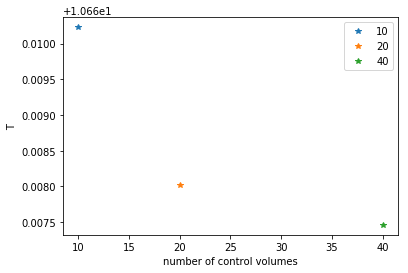

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
ncv = 5
for x, T in zip(xPosition, Temp):
    ncv= 2*ncv
    plt.plot(ncv, T, '*', label=ncv)
    print ('For number of control volumes  ',ncv,)
    print ('Value of temperature at x = 0 is  ',T)
    print('\n' )
    i=i+1
    
plt.xlabel("number of control volumes")
plt.ylabel("T")
plt.legend()
plt.show()

### Numerical Representation of Grid Independence

The difference between temperature at 20 and 40 control voulumes is

In [12]:
((10.668014650539245 - 10.667461324145446)/10.667461324145446)*100

0.0051870485112206505

0.00518 % which is quite reasonable. So, through grid independence study, it can be concluded that 20 control volumes are enogh to give a grid independent solution. 

# <center><font color=|blue|>Implementation of Fully Implicit First-Order Scheme with 20 control volumes</font></center>

## For 32 time steps

In [13]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 32
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = FirstOrderTransientModel(grid, T, Told, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    
    # Update the time information
    time += dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.541303125
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 4.996003610813204e-13; Avg. Resid. = 2.3320234632251413e-13
Timestep = 1; Time = 0.62910625
Iteration = 0; Max. Resid. = 2.7788245590036804; Avg. Resid. = 2.4491969699750427
Iteration = 1; Max. Resid. = 4.0101255649460654e-13; Avg. Resid. = 1.2740919430598295e-13
Timestep = 2; Time = 0.716909375
Iteration = 0; Max. Resid. = 2.6092653121543203; Avg. Resid. = 2.299780880331931
Iteration = 1; Max. Resid. = 2.886579864025407e-13; Avg. Resid. = 1.2965184481572578e-13
Timestep = 3; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 2.4500592484568524; Avg. Resid. = 2.159477237353607
Iteration = 1; Max. Resid. = 2.0250467969162855e-13; Avg. Resid. = 7.387424005855791e-14
Timestep = 4; Time = 0.8925156249999999
Iteration = 0; Max. Resid. = 2.3005741539600417; Avg. Resid. = 2.027732063101986
Iteration = 1; Max. Resid. = 1.8696155734687636e-13; Avg. 

[10.67022766 10.67022766 10.65048836 10.61104629 10.55197441 10.47338199
 10.37541444 10.25825298 10.12211435  9.96725041  9.79394764  9.60252664
  9.39334153  9.1667793   8.92325906  8.66323132  8.3871771   8.09560711
  7.78906071  7.46810502  7.13333376  6.95935001]


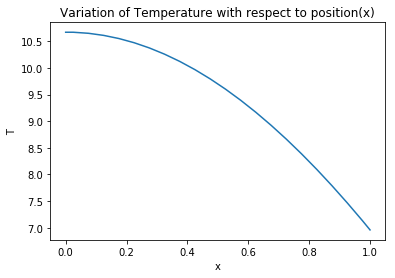

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T32I1all = T
T32I1 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of analytical T (temperature)

Analytically the one-term Fourier solution for this problem is given by:

$$
\frac{T-T_{\infty}}{T_i-T_{\infty}}=C_1 \exp\left(-\zeta^2\frac{\alpha t}{L^2}\right)\cos\left(\zeta \frac{x}{L}\right)
$$

Here,

Parameters          | Valiue                     | Remarks
:----------:        | :------------------------: |:------------------------:
$T_i $              | 100 [$^\circ$C]            |Given 
$T_{\infty}$        | 0 [$^\circ$C]              |Given
$C_1$               | 1.1191                     |Given constant
$\zeta $            | 0.8603                     |Given constant
L                   | 1 [m]                      |Assumed for simplicity

$$ \frac{\alpha t_2}{L^2}= 3.2632$$


In [15]:
import numpy as np
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
L    = 1
t2   = 3.2632 

Tana = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t2/L**2))*np.cos(zeta*grid.xP/L)


## Calculation of Error for 32 time steps

In [16]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar32 = sum (difference/(ncv+2))
t32 = dt

## For 16 time steps

In [17]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 16
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = FirstOrderTransientModel(grid, T, Told, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.62910625
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 3.4994229736184934e-13; Avg. Resid. = 1.3350431871117507e-13
Timestep = 1; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 2.619021838468995; Avg. Resid. = 2.308370484965658
Iteration = 1; Max. Resid. = 2.1227464230832993e-13; Avg. Resid. = 8.905098880518381e-14
Timestep = 2; Time = 0.9803187499999999
Iteration = 0; Max. Resid. = 2.3178044993851183; Avg. Resid. = 2.042910303322877
Iteration = 1; Max. Resid. = 2.2248869413488137e-13; Avg. Resid. = 9.166001291305293e-14
Timestep = 3; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 2.0512434512261275; Avg. Resid. = 1.8079752454512523
Iteration = 1; Max. Resid. = 2.4780177909633494e-13; Avg. Resid. = 1.1278755707166965e-13
Timestep = 4; Time = 1.3315312499999998
Iteration = 0; Max. Resid. = 1.8153446075237407; Avg. Resid. = 1.6000570695984409
Iteration = 1; Max. Resid. = 1.934008508897

[11.32622567 11.32622567 11.30527281 11.26340587 11.20070229 11.11727807
 11.01328754 10.88892308 10.74441474 10.58002988 10.39607258 10.19288315
  9.97083749  9.73034637  9.47185468  9.19584062  8.90281479  8.59331928
  8.26792663  7.9272388   7.57188605  7.3872059 ]


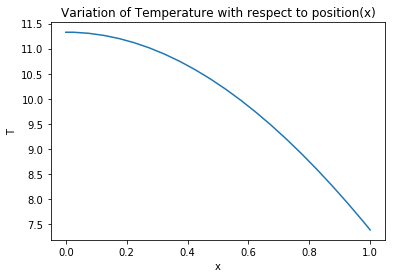

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T16I1all = T
T16I1 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 16 time steps

In [19]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar16 = sum (difference/(ncv+2))
t16 = dt

## For 8 time steps

In [20]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 8
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = FirstOrderTransientModel(grid, T, Told, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 3.672617765460018e-13; Avg. Resid. = 1.0542677841840487e-13
Timestep = 1; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 2.3488812057394166; Avg. Resid. = 2.0702882025622604
Iteration = 1; Max. Resid. = 3.057554209817681e-13; Avg. Resid. = 1.2209122601802847e-13
Timestep = 2; Time = 1.5071374999999998
Iteration = 0; Max. Resid. = 1.864336126896688; Avg. Resid. = 1.6432332486097097
Iteration = 1; Max. Resid. = 1.6764367671839864e-13; Avg. Resid. = 7.877587471227798e-14
Timestep = 3; Time = 1.8583499999999997
Iteration = 0; Max. Resid. = 1.4797574932387645; Avg. Resid. = 1.3042687401363484
Iteration = 1; Max. Resid. = 1.5498713423767185e-13; Avg. Resid. = 5.3512749786932545e-14
Timestep = 4; Time = 2.2095624999999997
Iteration = 0; Max. Resid. = 1.1745131898492642; Avg. Resid. = 1.0352252152922186
Iteration = 1; Max. Resid. = 1.139

[12.59913515 12.59913515 12.57582749 12.52925529 12.4595047  12.36670477
 12.25102715 12.11268586 11.95193681 11.76907738 11.56444585 11.33842077
 11.09142028 10.82390132 10.53635878 10.22932459  9.90336675  9.55908827
  9.19712604  8.81814966  8.42286023  8.21742461]


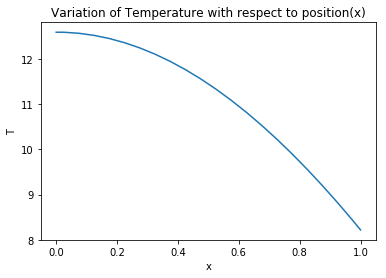

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T8I1all = T
T8I1 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 8 time steps

In [22]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar8 = sum (difference/(ncv+2))
t8 = dt

## For 4 time steps

In [23]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 4
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = FirstOrderTransientModel(grid, T, Told, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 2.1449508835758024e-13; Avg. Resid. = 1.0387246618392965e-13
Timestep = 1; Time = 1.8583499999999997
Iteration = 0; Max. Resid. = 1.9472025671866784; Avg. Resid. = 1.7162606277107304
Iteration = 1; Max. Resid. = 1.8984813721090177e-13; Avg. Resid. = 7.796541190430162e-14
Timestep = 2; Time = 2.5607749999999996
Iteration = 0; Max. Resid. = 1.28123104200597; Avg. Resid. = 1.129285082892825
Iteration = 1; Max. Resid. = 1.6464607455191071e-13; Avg. Resid. = 6.258327189812008e-14
Timestep = 3; Time = 3.2631999999999994
Iteration = 0; Max. Resid. = 0.8430369352809207; Avg. Resid. = 0.7430593772413934
Iteration = 1; Max. Resid. = 6.128431095930864e-14; Avg. Resid. = 3.207156762385921e-14


[14.99264957 14.99264957 14.96491404 14.90949431 14.82649289 14.71606332
 14.57840991 14.41378729 14.22250001 14.00490194 13.76139563 13.49243154
 13.19850725 12.8801665  12.5379982  12.17263534 11.78475382 11.37507121
 10.94434538 10.49337315 10.02298881  9.77852567]


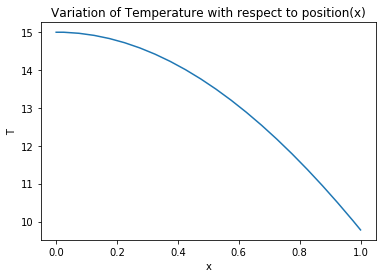

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T4I1all = T
T4I1 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 4 time steps

In [25]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar4 = sum (difference/(ncv+2))
t4 = dt

## For 2 time steps

In [26]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 2
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = FirstOrderTransientModel(grid, T, Told, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))
   

Timestep = 0; Time = 1.85835
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 2.90878432451791e-13; Avg. Resid. = 1.1989298442927066e-13
Timestep = 1; Time = 3.2632
Iteration = 0; Max. Resid. = 1.4509565669382594; Avg. Resid. = 1.278874519950752
Iteration = 1; Max. Resid. = 1.6686652060116103e-13; Avg. Resid. = 5.401790126313699e-14


[19.22771853 19.22771853 19.19214835 19.12107379 19.01462633 18.87300291
 18.69646552 18.48534075 18.24001916 17.9609546  17.64866333 17.30372306
 16.92677193 16.51850728 16.07968437 15.61111502 15.11366605 14.58825772
 14.035862   13.45750081 12.85424407 12.54072592]


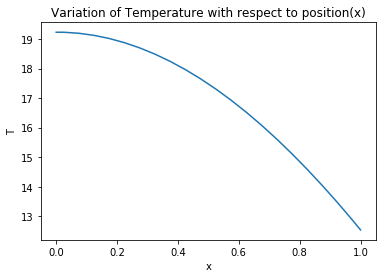

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(grid.xP, T)

print(T)
T2I1all = T
T2I1 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 2 time steps

In [28]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar2 = sum (difference/(ncv+2))
t2 = dt


## Calculation of P

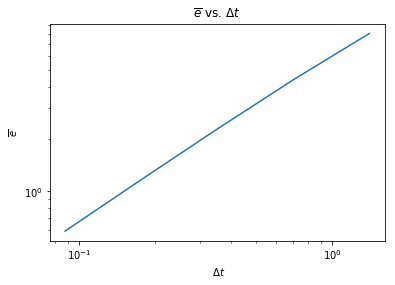

0.946687892533768 1.7936228340543985


In [29]:
import numpy as np
ebarI1 = [ebar2, ebar4, ebar8, ebar16, ebar32]
t    = [t2, t4, t8, t16, t32]
plt.loglog(t, ebarI1)
plt.title("$\overline{e}$ vs. $\Delta t$ ")
plt.xlabel(" $\Delta t$")
plt.ylabel("$\overline{e}$")
plt.show()
y = np.log(ebarI1)
x = np.log(t)
A = np.vstack([x, np.ones(len(x))]).T
p, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(p, c)


The oder of accuracy obtained here is p=0.946 which is close to 1. As it is achieved for First Order Fully implicit scheme so it can be considered as a reasonable value of order of accuracy. 

## Plot of T(0,t2) versus the number of timesteps

Text(0,0.5,'T')

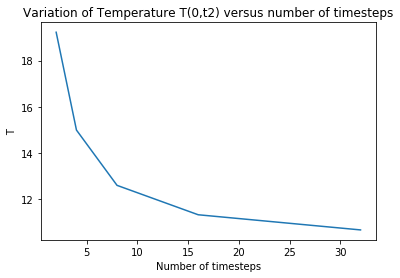

In [30]:
import matplotlib.pyplot as plt
TI1    = [T2I1, T4I1, T8I1, T16I1, T32I1]
timesteps = [2, 4, 8, 16, 32]
plt.plot(timesteps, TI1)
plt.title('Variation of Temperature T(0,t2) versus number of timesteps')
plt.xlabel("Number of timesteps")
plt.ylabel("T")

# <center><font color=|blue|>Fully Implicit Second-Order Time Discretization Scheme </font></center>

In [31]:
import numpy as np
class SecondOrderTransientModel:
    """Class defining a first order implicit transient model"""

    def __init__(self, grid, T,Told,Toldold, rho, cp, dt):
        """Constructor"""
        self._grid = grid
        self._T = T
        self._Told = Told
        self._Toldold = Toldold
        self._rho = rho
        self._cp = cp
        self._dt = dt

    def add(self, coeffs):
        """Function to add transient term to coefficient arrays"""

        # Calculate the transient term
        transientterm2 = self._rho*self._cp*self._grid.vol*((3/2)*self._T[1:-1]-2*self._Told[1:-1]+0.5*self._Toldold[1:-1])*(1/self._dt)        
       
        # Calculate the linearization coefficient
        coefftransient2 = self._rho*self._cp*self._grid.vol*(3/2)*(1/self._dt)  
        
        # Add to coefficient arrays
        coeffs.accumulate_aP(coefftransient2)
        coeffs.accumulate_rP(transientterm2)
        
        return coeffs

## Study of Grid Independence (considering 32 time steps)

In [32]:
def Implicit2ndorderforGridIndependence(ncv):
    import numpy as np
    from numpy.linalg import norm

    # Set the timestep information
    nTime = 32
    dt = (3.2632-0.4535)/nTime
    time = 0.4535

    # Set the maximum number of iterations and convergence criterion
    maxIter = 100
    converged = 1e-6

    # Define thermophysical properties
    # All of these are assumed 1 for simplicity
    rho = 1
    cp = 1
    k = 1

    # Define convection parameters
    h = 1
    To = 0

    # Define the coefficients
    coeffs = ScalarCoeffs(grid.ncv)

    # Constants and Initial conditions
    C1   = 1.1191
    Ti   = 100
    Tinf = 0
    zeta = 0.8603
    alpha= 1
    t1   = 0.4535

    # Initialize field variable arrays
    T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

    # Define boundary conditions
    west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
    east_bc = RobinBc(T,Tinf, grid, h, k, BoundaryLocation.EAST)

    # Apply boundary conditions
    west_bc.apply()
    east_bc.apply()

    # Create list to store the solutions at each timestep
    T_solns = [np.copy(T)]

    # Define the transient model

    Told = np.copy(T) 
    transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
    Toldold = np.copy(Told)
    transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

    # Define the diffusion model
    diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

    # Define the surface convection model
    surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

    # Loop through all timesteps
    for tStep in range(nTime):
        
        # Update the time information
        time += dt

        # Print the timestep information
        print("Timestep = {}; Time = {}".format(tStep, time))

        # Store the "old" temperature field
        Toldold[:] = Told[:]
        Told[:] = T[:]
                
        # Iterate until the solution is converged
        for i in range(maxIter):
            # Zero the coefficients and add each influence
            coeffs.zero()
            coeffs = diffusion.add(coeffs)
            if tStep == 0:
                coeffs = transient1.add(coeffs)
            else:
                coeffs = transient2.add(coeffs)
            # Compute residual and check for convergence 
            maxResid = norm(coeffs.rP, np.inf)
            avgResid = np.mean(np.absolute(coeffs.rP))
            print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
            if maxResid < converged:
                break

            # Solve the sparse matrix system
            dT = solve(coeffs)

            # Update the solution and boundary conditions
            T[1:-1] += dT
            west_bc.apply()
            east_bc.apply()

        # Store the solution
        T_solns.append(np.copy(T))
    return max(T)

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
xPosition=[]
Temp=[]
ncv = 10

for i in range(3):
    ncv= 2*ncv
    grid = Grid(lx, ly, lz, ncv)
    xPosition.append(grid.xP)
    Temp.append(Implicit2ndorderforGridIndependence(ncv))

Timestep = 0; Time = 0.541303125
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 4.996003610813204e-13; Avg. Resid. = 2.3320234632251413e-13
Timestep = 1; Time = 0.62910625
Iteration = 0; Max. Resid. = 4.16823683850539; Avg. Resid. = 3.673795454962567
Iteration = 1; Max. Resid. = 3.2152058793144533e-13; Avg. Resid. = 1.0754730439543892e-13
Timestep = 2; Time = 0.716909375
Iteration = 0; Max. Resid. = 3.9374610105415933; Avg. Resid. = 3.47044033581996
Iteration = 1; Max. Resid. = 3.2596148002994596e-13; Avg. Resid. = 1.0418332863082469e-13
Timestep = 3; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 3.7002377196742486; Avg. Resid. = 3.261389576180823
Iteration = 1; Max. Resid. = 2.69562150378988e-13; Avg. Resid. = 9.551248680850221e-14
Timestep = 4; Time = 0.8925156249999999
Iteration = 0; Max. Resid. = 3.4708165130465822; Avg. Resid. = 3.059197548172846
Iteration = 1; Max. Resid. = 2.3381296898605797e-13; Avg. Resid

Iteration = 1; Max. Resid. = 8.78019879024805e-13; Avg. Resid. = 2.7077749764625737e-13
Timestep = 12; Time = 1.5949406249999998
Iteration = 0; Max. Resid. = 0.5160462971363537; Avg. Resid. = 0.4547097164624166
Iteration = 1; Max. Resid. = 9.830469771543449e-13; Avg. Resid. = 2.6359713023449415e-13
Timestep = 13; Time = 1.6827437499999998
Iteration = 0; Max. Resid. = 0.48352913838366673; Avg. Resid. = 0.4260575050899106
Iteration = 1; Max. Resid. = 7.434053372890048e-13; Avg. Resid. = 1.6409686109941645e-13
Timestep = 14; Time = 1.7705468749999997
Iteration = 0; Max. Resid. = 0.4530609214657696; Avg. Resid. = 0.39921069907333945
Iteration = 1; Max. Resid. = 4.3509640335059885e-13; Avg. Resid. = 1.5916643003599517e-13
Timestep = 15; Time = 1.8583499999999997
Iteration = 0; Max. Resid. = 0.42451256109965774; Avg. Resid. = 0.3740555581003524
Iteration = 1; Max. Resid. = 4.681255383331973e-13; Avg. Resid. = 1.619253342521887e-13
Timestep = 16; Time = 1.9461531249999997
Iteration = 0; Max. 

### Graphical Representation of Grid Independence

For number of control volumes   10
Value of temperature at x = 0 is   10.003643667041816


For number of control volumes   20
Value of temperature at x = 0 is   10.001309898783434


For number of control volumes   40
Value of temperature at x = 0 is   10.000726385052412




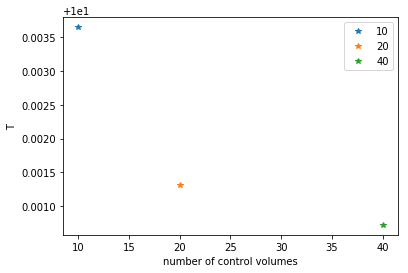

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
ncv = 5
for x, T in zip(xPosition, Temp):
    ncv= 2*ncv
    plt.plot(ncv, T, '*', label=ncv)
    print ('For number of control volumes  ',ncv,)
    print ('Value of temperature at x = 0 is  ',T)
    print('\n' )
    i=i+1
    
plt.xlabel("number of control volumes")
plt.ylabel("T")
plt.legend()
plt.show()

### Numerical Representation of Grid Independence

The difference between temperature at 20 and 40 control voulumes is

In [35]:
((10.001309898783434 - 10.000726385052412)/10.000726385052412)*100

0.005834713485362246

0.00583 % which is quite reasonable. So, through grid independence study, it can be concluded that 20 control volumes are enogh to give a grid independent solution. 

# <center><font color=|blue|>Implementation of Fully Implicit Second-Order Scheme with 20 control volumes</font></center>

## For 32 time steps

In [36]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 32
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model

Toldold = np.copy(Told)
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    
    # Update the time information
    time += dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.541303125
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 4.996003610813204e-13; Avg. Resid. = 2.3320234632251413e-13
Timestep = 1; Time = 0.62910625
Iteration = 0; Max. Resid. = 4.16823683850539; Avg. Resid. = 3.673795454962567
Iteration = 1; Max. Resid. = 3.2152058793144533e-13; Avg. Resid. = 1.0754730439543892e-13
Timestep = 2; Time = 0.716909375
Iteration = 0; Max. Resid. = 3.9374610105415933; Avg. Resid. = 3.47044033581996
Iteration = 1; Max. Resid. = 3.2596148002994596e-13; Avg. Resid. = 1.0418332863082469e-13
Timestep = 3; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 3.7002377196742486; Avg. Resid. = 3.261389576180823
Iteration = 1; Max. Resid. = 2.69562150378988e-13; Avg. Resid. = 9.551248680850221e-14
Timestep = 4; Time = 0.8925156249999999
Iteration = 0; Max. Resid. = 3.4708165130465822; Avg. Resid. = 3.059197548172846
Iteration = 1; Max. Resid. = 2.3381296898605797e-13; Avg. Resid

[10.00364367 10.00364367  9.98513751  9.94815944  9.89277787  9.81909523
  9.72724784  9.61740562  9.48977176  9.34458239  9.18210608  9.00264342
  8.8065264   8.59411782  8.36581063  8.12202718  7.86321846  7.58986325
  7.30246724  7.00156209  6.68770446  6.52458972]


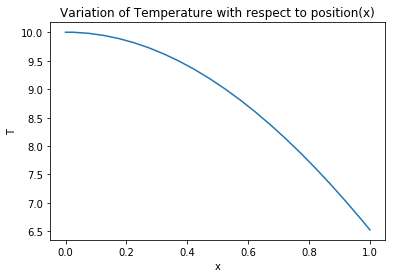

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T32I2all = T
T32I2 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 32 time steps

In [38]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar32 = sum (difference/(ncv+2))
t32 = dt

## For 16 time steps

In [39]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 16
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model

Toldold = np.copy(Told) 
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]
    
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.62910625
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 3.4994229736184934e-13; Avg. Resid. = 1.3350431871117507e-13
Timestep = 1; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 3.9285327577034574; Avg. Resid. = 3.4625557274484686
Iteration = 1; Max. Resid. = 2.3314683517128287e-13; Avg. Resid. = 1.1388667786604855e-13
Timestep = 2; Time = 0.9803187499999999
Iteration = 0; Max. Resid. = 3.510891328111379; Avg. Resid. = 3.094501749397174
Iteration = 1; Max. Resid. = 1.5409895581797173e-13; Avg. Resid. = 6.793454687681333e-14
Timestep = 3; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 3.102869294707225; Avg. Resid. = 2.734893430064768
Iteration = 1; Max. Resid. = 2.5224267119483557e-13; Avg. Resid. = 1.1470824290427118e-13
Timestep = 4; Time = 1.3315312499999998
Iteration = 0; Max. Resid. = 2.73033708164012; Avg. Resid. = 2.4065452645800964
Iteration = 1; Max. Resid. = 1.35669253609194

[10.01204834 10.01204834  9.99352664  9.95651751  9.9010894   9.82734485
  9.7354203   9.62548579  9.4977447   9.35243335  9.18982053  9.0102071
  8.8139253   8.60133827  8.37283926  8.128851    7.86982484  7.59623996
  7.30860249  7.00744453  6.69332322  6.53007143]


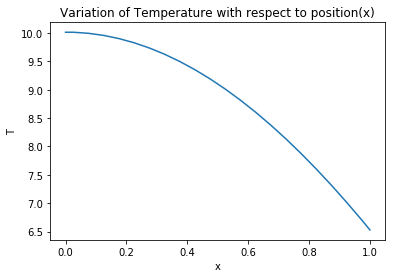

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T16I2all = T
T16I2 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 16 time steps

In [41]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar16 = sum (difference/(ncv+2))
t16 = dt

## For 8 time steps

In [42]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 8
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model

Toldold = np.copy(Told) 
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]
        
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 3.672617765460018e-13; Avg. Resid. = 1.0542677841840487e-13
Timestep = 1; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 3.5233218086090754; Avg. Resid. = 3.1054323038433678
Iteration = 1; Max. Resid. = 1.6697754290362354e-13; Avg. Resid. = 8.033573806187633e-14
Timestep = 2; Time = 1.5071374999999998
Iteration = 0; Max. Resid. = 2.829549304010432; Avg. Resid. = 2.4939839738089815
Iteration = 1; Max. Resid. = 3.461675390781238e-13; Avg. Resid. = 1.3802847753652259e-13
Timestep = 3; Time = 1.8583499999999997
Iteration = 0; Max. Resid. = 2.214598174066163; Avg. Resid. = 1.9519693742297513
Iteration = 1; Max. Resid. = 1.794120407794253e-13; Avg. Resid. = 7.39575067854048e-14
Timestep = 4; Time = 2.2095624999999997
Iteration = 0; Max. Resid. = 1.7128519078556155; Avg. Resid. = 1.5097236954708237
Iteration = 1; Max. Resid. = 1.2123635

[10.07220596 10.07220596 10.05357297 10.01634146  9.96058031  9.88639267
  9.79391579  9.68332073  9.55481211  9.40862764  9.24503776  9.06434511
  8.86688396  8.65301958  8.42314764  8.17769336  7.91711083  7.64188212
  7.35251637  7.0495489   6.73354018  6.56930749]


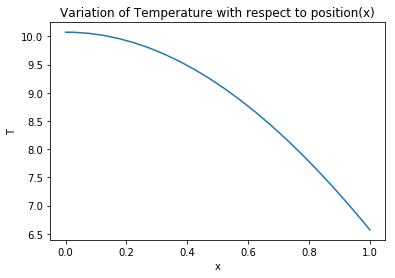

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T8I2all = T
T8I2 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 8 time steps

In [44]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar8 = sum (difference/(ncv+2))
t8 = dt

## For 4 time steps

In [45]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 4
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model

Toldold = np.copy(Told)
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]
    Told[:] = T[:]
    
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
        
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 2.1449508835758024e-13; Avg. Resid. = 1.0387246618392965e-13
Timestep = 1; Time = 1.8583499999999997
Iteration = 0; Max. Resid. = 2.9208038507800076; Avg. Resid. = 2.574390941566059
Iteration = 1; Max. Resid. = 1.6631140908884845e-13; Avg. Resid. = 8.468781231840694e-14
Timestep = 2; Time = 2.5607749999999996
Iteration = 0; Max. Resid. = 1.9185795255335978; Avg. Resid. = 1.6910545857335575
Iteration = 1; Max. Resid. = 1.511013536514838e-13; Avg. Resid. = 6.283029652109917e-14
Timestep = 3; Time = 3.2631999999999994
Iteration = 0; Max. Resid. = 1.1767491536452983; Avg. Resid. = 1.0371988842095503
Iteration = 1; Max. Resid. = 8.132383655379272e-14; Avg. Resid. = 2.860767178702872e-14


[10.78339168 10.78339168 10.76344305 10.7235827  10.66388436 10.58445846
 10.48545195 10.36704797 10.22946557 10.07295926  9.89781857  9.7043675
  9.49296391  9.26399889  9.01789601  8.75511055  8.47612863  8.18146638
  7.87166888  7.54730924  7.20898753  7.03315856]


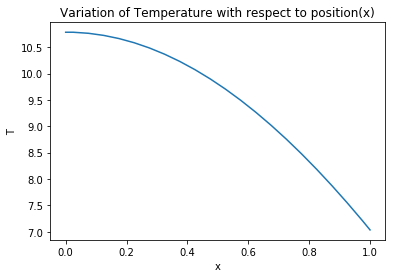

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T4I2all = T
T4I2 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 4 time steps

In [47]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar4 = sum (difference/(ncv+2))
t4 = dt

## For 2 time steps

In [48]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 2
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535

# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model

Toldold = np.copy(Told) 
Told = np.copy(T)

transient1 = FirstOrderTransientModel(grid, T,Told, rho, cp, dt)
transient2 = SecondOrderTransientModel(grid, T,Told,Toldold, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Toldold[:] = Told[:]   
    Told[:] = T[:]
        
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        if tStep == 0:
            coeffs = transient1.add(coeffs)
        else:
            coeffs = transient2.add(coeffs)
            
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))
   

Timestep = 0; Time = 1.85835
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 2.90878432451791e-13; Avg. Resid. = 1.1989298442927066e-13
Timestep = 1; Time = 3.2632
Iteration = 0; Max. Resid. = 2.176434850407286; Avg. Resid. = 1.9183117799260767
Iteration = 1; Max. Resid. = 1.3444800828210646e-13; Avg. Resid. = 6.503964034010324e-14


[15.13665102 15.13665102 15.10864927 15.05269758 14.96889946 14.8574099
 14.71843516 14.55223231 14.35910881 14.1394219  13.89357797 13.6220318
 13.3252857  13.0038886  12.65843503 12.28956401 11.89795791 11.4843411
 11.0494787  10.59417512 10.11927257  9.87246104]


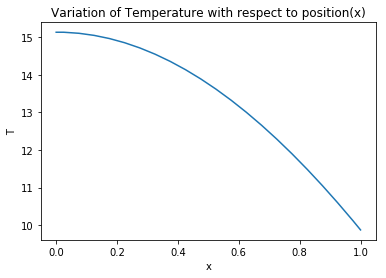

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(grid.xP, T)

print(T)
T2I2all = T
T2I2 = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 2 time steps

In [50]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar2 = sum (difference/(ncv+2))
t2 = dt


## Calculation of P

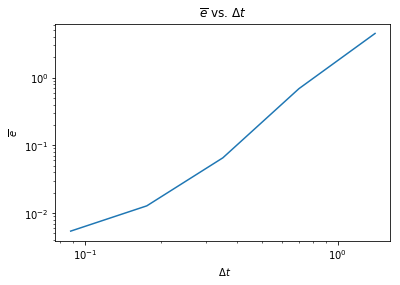

2.515456500637571 0.3974607762482105


In [51]:
import matplotlib.pyplot as plt
import numpy as np
ebarI2 = [ebar2, ebar4, ebar8, ebar16, ebar32]
t    = [t2, t4, t8, t16, t32]
plt.loglog(t, ebarI2)
plt.title("$\overline{e}$ vs. $\Delta t$ ")
plt.xlabel(" $\Delta t$")
plt.ylabel("$\overline{e}$")
plt.show()
y = np.log(ebarI2)
x = np.log(t)
A = np.vstack([x, np.ones(len(x))]).T
p, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(p, c)


The order of accuracy for second order fully implicit scheme is found to be 2.51 which not very close to the expected value (2) but not quiet unreasonable as these types of analyses sometimes may not give exactly what is expected according to theory. 

## Plot of T(0,t2) versus the number of timesteps

Text(0,0.5,'T')

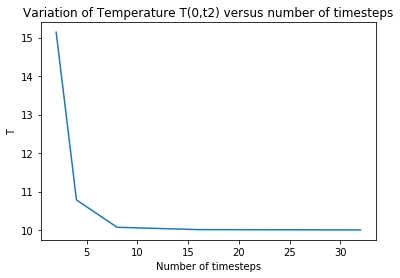

In [52]:
import matplotlib.pyplot as plt
TI2    = [T2I2, T4I2, T8I2, T16I2, T32I2]
timesteps = [2, 4, 8, 16, 32]
plt.plot(timesteps, TI2)
plt.title('Variation of Temperature T(0,t2) versus number of timesteps')
plt.xlabel("Number of timesteps")
plt.ylabel("T")

# <center><font color=|green|>Bonus</font></center>

# <center><font color=|blue|>Crank-Nicolson Time Discretization Scheme </font></center>

In [53]:
import numpy as np
class CrankNicolsonModel:
    """Class defining a CrankNicolson implicit transient model"""

    def __init__(self, grid, gamma, phi, Told, omega, rho, cp, dt):
        """Constructor"""
        self._grid = grid
        self._phi = phi
        self._gamma = gamma
        self._Told = Told
        self._omega = omega
        self._rho = rho
        self._cp = cp
        self._dt = dt

    def add(self, coeffs):
        """Function to add diffusion term and transient terms to coefficient arrays"""
  
        # Calculate the west and east face diffusion flux terms for each face
        flux_w =  self._omega*self._gamma*self._grid.Aw*(self._phi[1:-1]-self._phi[0:-2])/self._grid.dx_WP \
                 - self._omega*self._gamma*self._grid.Aw*(self._Told[1:-1]-self._Told[0:-2])/self._grid.dx_WP
        
        flux_e =  self._omega*self._gamma*self._grid.Ae*(self._phi[2:]-self._phi[1:-1])/self._grid.dx_PE\
                 - self._omega*self._gamma*self._grid.Ae*(self._Told[2:]-self._Told[1:-1])/self._grid.dx_PE
      
        # Calculate the net flux from each cell
        flux = flux_e - flux_w
        
        # Calculate the transient term
        transientterm = self._rho*self._cp*self._grid.vol*(self._phi[1:-1]-self._Told[1:-1])*(1/self._dt)  
        
        # Calculate the linearization coefficient
        coefftransient = self._rho*self._cp*self._grid.vol*(1/self._dt) 

        # Add to coefficient arrays
        coeffs.accumulate_aP(coefftransient)
        coeffs.accumulate_rP(transientterm)
        coeffs.accumulate_rP(flux)
        return coeffs

## Study of Grid Independence (considering 32 time steps)

In [54]:
def CrankNicolsonModelforGridIndependence(ncv):
    import numpy as np
    from numpy.linalg import norm

    # Set the timestep information
    nTime = 32
    dt = (3.2632-0.4535)/nTime
    time = 0.4535

    # Set the maximum number of iterations and convergence criterion
    maxIter = 100
    converged = 1e-6

    # Define thermophysical properties
    # All of these are assumed 1 for simplicity
    rho = 1
    cp = 1
    k = 1

    # Define convection parameters
    h = 1
    To = 0

    # Define the coefficients
    coeffs = ScalarCoeffs(grid.ncv)

    # Constants and Initial conditions
    C1   = 1.1191
    Ti   = 100
    Tinf = 0
    zeta = 0.8603
    alpha= 1
    t1   = 0.4535
    omega=0.5

    # Initialize field variable arrays
    T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

    # Define boundary conditions
    west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
    east_bc = RobinBc(T,Tinf, grid, h, k, BoundaryLocation.EAST)

    # Apply boundary conditions
    west_bc.apply()
    east_bc.apply()

    # Create list to store the solutions at each timestep
    T_solns = [np.copy(T)]

    # Define the transient model
    Told = np.copy(T)
    transient = CrankNicolsonModel(grid, k, T, Told, omega, rho, cp, dt)

    # Define the diffusion model
    diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

    # Define the surface convection model
    surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

    # Loop through all timesteps
    for tStep in range(nTime):
        
        # Update the time information
        time += dt

        # Print the timestep information
        print("Timestep = {}; Time = {}".format(tStep, time))

        # Store the "old" temperature field
        Told[:] = T[:]

        # Iterate until the solution is converged
        for i in range(maxIter):
            # Zero the coefficients and add each influence
            coeffs.zero()
            coeffs = diffusion.add(coeffs)
            coeffs = transient.add(coeffs)
            # Compute residual and check for convergence 
            maxResid = norm(coeffs.rP, np.inf)
            avgResid = np.mean(np.absolute(coeffs.rP))
            print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
            if maxResid < converged:
                break

            # Solve the sparse matrix system
            dT = solve(coeffs)

            # Update the solution and boundary conditions
            T[1:-1] += dT
            west_bc.apply()
            east_bc.apply()

        # Store the solution
        T_solns.append(np.copy(T))
    return max(T)

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
xPosition=[]
Temp=[]
ncv = 10

for i in range(3):
    ncv= 2*ncv
    grid = Grid(lx, ly, lz, ncv)
    xPosition.append(grid.xP)
    Temp.append(CrankNicolsonModelforGridIndependence(ncv))

Timestep = 0; Time = 0.541303125
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 0.09028740580160255; Avg. Resid. = 0.07955501664813855
Iteration = 2; Max. Resid. = 0.002753891188480573; Avg. Resid. = 0.0024234859132894137
Iteration = 3; Max. Resid. = 0.00017212799591814765; Avg. Resid. = 8.989992313984674e-05
Iteration = 4; Max. Resid. = 0.00010614231701344679; Avg. Resid. = 1.233417234050016e-05
Iteration = 5; Max. Resid. = 5.1247509072371855e-05; Avg. Resid. = 5.166700202807739e-06
Iteration = 6; Max. Resid. = 2.451264169844869e-05; Avg. Resid. = 2.4991836462873173e-06
Iteration = 7; Max. Resid. = 1.175476120485186e-05; Avg. Resid. = 1.2073361891129507e-06
Iteration = 8; Max. Resid. = 5.6515701774007e-06; Avg. Resid. = 5.838577488703756e-07
Iteration = 9; Max. Resid. = 2.7230505752484646e-06; Avg. Resid. = 2.835196715400556e-07
Iteration = 10; Max. Resid. = 1.3143748665012112e-06; Avg. Resid. = 1.3779887005904712e-07
Ite

Iteration = 10; Max. Resid. = 5.975511223610397e-07; Avg. Resid. = 7.070260187314048e-08
Timestep = 9; Time = 1.3315312499999998
Iteration = 0; Max. Resid. = 1.6487083714410742; Avg. Resid. = 1.4531857711288134
Iteration = 1; Max. Resid. = 0.050292734673033745; Avg. Resid. = 0.0443288005492263
Iteration = 2; Max. Resid. = 0.0015342287547925881; Avg. Resid. = 0.0013524743641362246
Iteration = 3; Max. Resid. = 0.00011201708709096536; Avg. Resid. = 4.551789746967128e-05
Iteration = 4; Max. Resid. = 4.055567224203749e-05; Avg. Resid. = 5.6148192927540915e-06
Iteration = 5; Max. Resid. = 1.945803216973907e-05; Avg. Resid. = 2.304237458072844e-06
Iteration = 6; Max. Resid. = 9.534518045528628e-06; Avg. Resid. = 1.1293072774698487e-06
Iteration = 7; Max. Resid. = 4.678847904004968e-06; Avg. Resid. = 5.55808783686551e-07
Iteration = 8; Max. Resid. = 2.296576929294858e-06; Avg. Resid. = 2.735804073061843e-07
Iteration = 9; Max. Resid. = 1.127429860359186e-06; Avg. Resid. = 1.3465449240079862e-0

Iteration = 6; Max. Resid. = 6.4130359522796e-06; Avg. Resid. = 6.745012060049849e-07
Iteration = 7; Max. Resid. = 3.173952145774095e-06; Avg. Resid. = 3.3222345036665326e-07
Iteration = 8; Max. Resid. = 1.5707259305441923e-06; Avg. Resid. = 1.6408259724820519e-07
Iteration = 9; Max. Resid. = 7.773114008013948e-07; Avg. Resid. = 8.120272569911435e-08
Timestep = 18; Time = 2.121759375
Iteration = 0; Max. Resid. = 0.9185452473307973; Avg. Resid. = 0.8096127548981855
Iteration = 1; Max. Resid. = 0.028019519431654483; Avg. Resid. = 0.024696368652802468
Iteration = 2; Max. Resid. = 0.00085472845624468; Avg. Resid. = 0.0007532357693681602
Iteration = 3; Max. Resid. = 6.883705658022876e-05; Avg. Resid. = 2.5427415912609995e-05
Iteration = 4; Max. Resid. = 2.559197220319831e-05; Avg. Resid. = 3.086863440188159e-06
Iteration = 5; Max. Resid. = 1.240628689380685e-05; Avg. Resid. = 1.3009443399381037e-06
Iteration = 6; Max. Resid. = 6.1316071411354756e-06; Avg. Resid. = 6.405760536065674e-07
Iter

Iteration = 6; Max. Resid. = 3.700559274955051e-06; Avg. Resid. = 3.896806911346529e-07
Iteration = 7; Max. Resid. = 1.83147762078395e-06; Avg. Resid. = 1.9283063571184923e-07
Iteration = 8; Max. Resid. = 9.0638298416712e-07; Avg. Resid. = 9.543067452655319e-08
Timestep = 30; Time = 3.1753968750000023
Iteration = 0; Max. Resid. = 0.42109128116905475; Avg. Resid. = 0.37115312347574436
Iteration = 1; Max. Resid. = 0.012845044556891172; Avg. Resid. = 0.011321639213425836
Iteration = 2; Max. Resid. = 0.00039182443816748735; Avg. Resid. = 0.00034531375377356844
Iteration = 3; Max. Resid. = 3.7447301172610636e-05; Avg. Resid. = 1.1755762572709938e-05
Iteration = 4; Max. Resid. = 1.4647464885386707e-05; Avg. Resid. = 1.7267154648364924e-06
Iteration = 5; Max. Resid. = 7.130409211630884e-06; Avg. Resid. = 7.529882552870238e-07
Iteration = 6; Max. Resid. = 3.5251846718376e-06; Avg. Resid. = 3.7116484677968133e-07
Iteration = 7; Max. Resid. = 1.7444924602649792e-06; Avg. Resid. = 1.8366639923383

Iteration = 2; Max. Resid. = 0.0007674857608696017; Avg. Resid. = 0.000676004615969783
Iteration = 3; Max. Resid. = 0.00022298270186038582; Avg. Resid. = 3.160656789339134e-05
Iteration = 4; Max. Resid. = 0.00011774181494605962; Avg. Resid. = 6.812191934260637e-06
Iteration = 5; Max. Resid. = 5.859696153476257e-05; Avg. Resid. = 3.2126742509880344e-06
Iteration = 6; Max. Resid. = 2.9062059651363548e-05; Avg. Resid. = 1.5920191683949092e-06
Iteration = 7; Max. Resid. = 1.4411840733585812e-05; Avg. Resid. = 7.90181830442882e-07
Iteration = 8; Max. Resid. = 7.1472885619927595e-06; Avg. Resid. = 3.9223853685876886e-07
Iteration = 9; Max. Resid. = 3.544837212654528e-06; Avg. Resid. = 1.946883934095256e-07
Iteration = 10; Max. Resid. = 1.7582625108092387e-06; Avg. Resid. = 9.662764188234086e-08
Iteration = 11; Max. Resid. = 8.721727037253046e-07; Avg. Resid. = 4.795741846697066e-08
Timestep = 10; Time = 1.4193343749999998
Iteration = 0; Max. Resid. = 0.772674738782939; Avg. Resid. = 0.680878

Iteration = 11; Max. Resid. = 6.721475350746076e-07; Avg. Resid. = 3.792639149818866e-08
Timestep = 19; Time = 2.2095625
Iteration = 0; Max. Resid. = 0.43043006520534266; Avg. Resid. = 0.3792918378622949
Iteration = 1; Max. Resid. = 0.013132408165453774; Avg. Resid. = 0.011571791060418796
Iteration = 2; Max. Resid. = 0.000519500155157282; Avg. Resid. = 0.0003573796328926182
Iteration = 3; Max. Resid. = 0.00016819741935997223; Avg. Resid. = 1.9084132780335106e-05
Iteration = 4; Max. Resid. = 8.73312336617249e-05; Avg. Resid. = 5.139612874920096e-06
Iteration = 5; Max. Resid. = 4.3505719348801986e-05; Avg. Resid. = 2.451914063447691e-06
Iteration = 6; Max. Resid. = 2.1620166748059777e-05; Avg. Resid. = 1.2186255216317665e-06
Iteration = 7; Max. Resid. = 1.0742836882904339e-05; Avg. Resid. = 6.062692594857588e-07
Iteration = 8; Max. Resid. = 5.338115379061037e-06; Avg. Resid. = 3.0162032738645374e-07
Iteration = 9; Max. Resid. = 2.652586531703971e-06; Avg. Resid. = 1.5005715645471928e-07


Iteration = 9; Max. Resid. = 2.1865990037228666e-06; Avg. Resid. = 1.2649318544694088e-07
Iteration = 10; Max. Resid. = 1.0873838959812865e-06; Avg. Resid. = 6.292840342009277e-08
Iteration = 11; Max. Resid. = 5.407598101803135e-07; Avg. Resid. = 3.130629272138363e-08
Timestep = 28; Time = 2.999790625000002
Iteration = 0; Max. Resid. = 0.23977756142130596; Avg. Resid. = 0.21129124909120808
Iteration = 1; Max. Resid. = 0.007315605091765737; Avg. Resid. = 0.0064467381257751226
Iteration = 2; Max. Resid. = 0.000431602986160573; Avg. Resid. = 0.00020100361490744747
Iteration = 3; Max. Resid. = 0.00014582766336318498; Avg. Resid. = 1.3331859807070439e-05
Iteration = 4; Max. Resid. = 7.041777265467952e-05; Avg. Resid. = 4.178849279024705e-06
Iteration = 5; Max. Resid. = 3.4953733085762995e-05; Avg. Resid. = 2.0242661939152974e-06
Iteration = 6; Max. Resid. = 1.7380362495433843e-05; Avg. Resid. = 1.0059024581843269e-06
Iteration = 7; Max. Resid. = 8.643261722840467e-06; Avg. Resid. = 5.004205

Iteration = 9; Max. Resid. = 7.81254591347702e-06; Avg. Resid. = 2.0631308936813752e-07
Iteration = 10; Max. Resid. = 3.887111369338392e-06; Avg. Resid. = 1.0270067978684905e-07
Iteration = 11; Max. Resid. = 1.934185754448592e-06; Avg. Resid. = 5.1144401516656226e-08
Iteration = 12; Max. Resid. = 9.625081535680202e-07; Avg. Resid. = 2.5469075743550507e-08
Timestep = 5; Time = 0.9803187499999999
Iteration = 0; Max. Resid. = 0.534766442702903; Avg. Resid. = 0.4712032638285722
Iteration = 1; Max. Resid. = 0.016316265948852826; Avg. Resid. = 0.014376157534543276
Iteration = 2; Max. Resid. = 0.0006878941457103549; Avg. Resid. = 0.00045539555911581277
Iteration = 3; Max. Resid. = 0.0004947190852223615; Avg. Resid. = 2.5524005822893242e-05
Iteration = 4; Max. Resid. = 0.00025076158659698145; Avg. Resid. = 6.825967805147021e-06
Iteration = 5; Max. Resid. = 0.0001248990152724061; Avg. Resid. = 3.3040862490521516e-06
Iteration = 6; Max. Resid. = 6.214849761476682e-05; Avg. Resid. = 1.64354666868

Iteration = 1; Max. Resid. = 0.010351096702946816; Avg. Resid. = 0.009121375498301863
Iteration = 2; Max. Resid. = 0.0011040219598252854; Avg. Resid. = 0.00028015565940234244
Iteration = 3; Max. Resid. = 0.00045310219439465005; Avg. Resid. = 1.8865647729783204e-05
Iteration = 4; Max. Resid. = 0.0002227919096762787; Avg. Resid. = 6.120094575795543e-06
Iteration = 5; Max. Resid. = 0.00011091506063043433; Avg. Resid. = 2.9771150364812233e-06
Iteration = 6; Max. Resid. = 5.526193707550142e-05; Avg. Resid. = 1.48269023469913e-06
Iteration = 7; Max. Resid. = 2.753559960272378e-05; Avg. Resid. = 7.389328536683976e-07
Iteration = 8; Max. Resid. = 1.3720705320324766e-05; Avg. Resid. = 3.682492099341822e-07
Iteration = 9; Max. Resid. = 6.837074476823135e-06; Avg. Resid. = 1.835983164014121e-07
Iteration = 10; Max. Resid. = 3.4070286157594776e-06; Avg. Resid. = 9.153623073653028e-08
Iteration = 11; Max. Resid. = 1.6978239066878231e-06; Avg. Resid. = 4.563789453917999e-08
Iteration = 12; Max. Resi

Iteration = 8; Max. Resid. = 1.2245469516614094e-05; Avg. Resid. = 3.3269267854917765e-07
Iteration = 9; Max. Resid. = 6.106116352988522e-06; Avg. Resid. = 1.6594960579822264e-07
Iteration = 10; Max. Resid. = 3.0448111268538414e-06; Avg. Resid. = 8.277540254533061e-08
Iteration = 11; Max. Resid. = 1.518312375894948e-06; Avg. Resid. = 4.128757050587961e-08
Iteration = 12; Max. Resid. = 7.571246760929018e-07; Avg. Resid. = 2.0593575765504023e-08
Timestep = 22; Time = 2.4729718750000007
Iteration = 0; Max. Resid. = 0.17708634390402264; Avg. Resid. = 0.15603886241979895
Iteration = 1; Max. Resid. = 0.005403147688683108; Avg. Resid. = 0.004761316991898084
Iteration = 2; Max. Resid. = 0.0008957931262788682; Avg. Resid. = 0.00015392495487997655
Iteration = 3; Max. Resid. = 0.0003960236479809559; Avg. Resid. = 1.4378329222906536e-05
Iteration = 4; Max. Resid. = 0.00019592660390833905; Avg. Resid. = 5.39724763894342e-06
Iteration = 5; Max. Resid. = 9.765031403746738e-05; Avg. Resid. = 2.6555049

Iteration = 10; Max. Resid. = 2.769735997679157e-06; Avg. Resid. = 7.598966459462092e-08
Iteration = 11; Max. Resid. = 1.3816422418100327e-06; Avg. Resid. = 3.791212809054617e-08
Iteration = 12; Max. Resid. = 6.892174049810684e-07; Avg. Resid. = 1.8914654976651123e-08
Timestep = 31; Time = 3.2632000000000025
Iteration = 0; Max. Resid. = 0.09864572144877569; Avg. Resid. = 0.08692022909450112
Iteration = 1; Max. Resid. = 0.0030098110772876774; Avg. Resid. = 0.0026517745442946787
Iteration = 2; Max. Resid. = 0.0006551253048126815; Avg. Resid. = 9.714823868935268e-05
Iteration = 3; Max. Resid. = 0.00035501280848919403; Avg. Resid. = 1.1729002226944056e-05
Iteration = 4; Max. Resid. = 0.00017794990558425705; Avg. Resid. = 4.931062600885619e-06
Iteration = 5; Max. Resid. = 8.879259814846552e-05; Avg. Resid. = 2.436599816585741e-06
Iteration = 6; Max. Resid. = 4.429335213253227e-05; Avg. Resid. = 1.2152630033108666e-06
Iteration = 7; Max. Resid. = 2.2095120225038012e-05; Avg. Resid. = 6.06309

### Graphical Representation of Grid Independence

For number of control volumes   10
Value of temperature at x = 0 is   9.993884011747214


For number of control volumes   20
Value of temperature at x = 0 is   9.99155330012268


For number of control volumes   40
Value of temperature at x = 0 is   9.99097055147575




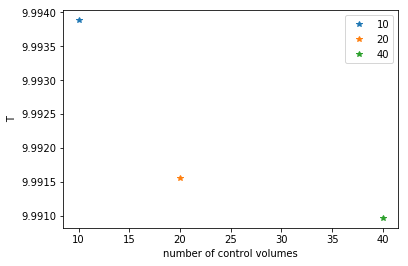

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

i = 0
ncv = 5
for x, T in zip(xPosition, Temp):
    ncv= 2*ncv
    plt.plot(ncv, T, '*', label=ncv)
    print ('For number of control volumes  ',ncv,)
    print ('Value of temperature at x = 0 is  ',T)
    print('\n' )
    i=i+1
    
plt.xlabel("number of control volumes")
plt.ylabel("T")
plt.legend()
plt.show()

### Numerical Representation of Grid Independence

The difference between temperature at 20 and 40 control voulumes is

In [57]:
((9.99155330012268 - 9.99097055147575)/9.99097055147575)*100

0.005832753123716056

0.00583 % which is quite reasonable. So, through grid independence study, it can be concluded that 20 control volumes are enogh to give a grid independent solution. 

# <center><font color=|blue|>Implementation of Crank-Nicolson Scheme with 20 control volumes</font></center>

## For 32 time steps

In [58]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 32
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535
omega=0.5
# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = CrankNicolsonModel(grid, k, T, Told, omega, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    
    # Update the time information
    time += dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.541303125
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 0.09028740580160255; Avg. Resid. = 0.07955501664813855
Iteration = 2; Max. Resid. = 0.002753891188480573; Avg. Resid. = 0.0024234859132894137
Iteration = 3; Max. Resid. = 0.00017212799591814765; Avg. Resid. = 8.989992313984674e-05
Iteration = 4; Max. Resid. = 0.00010614231701344679; Avg. Resid. = 1.233417234050016e-05
Iteration = 5; Max. Resid. = 5.1247509072371855e-05; Avg. Resid. = 5.166700202807739e-06
Iteration = 6; Max. Resid. = 2.451264169844869e-05; Avg. Resid. = 2.4991836462873173e-06
Iteration = 7; Max. Resid. = 1.175476120485186e-05; Avg. Resid. = 1.2073361891129507e-06
Iteration = 8; Max. Resid. = 5.6515701774007e-06; Avg. Resid. = 5.838577488703756e-07
Iteration = 9; Max. Resid. = 2.7230505752484646e-06; Avg. Resid. = 2.835196715400556e-07
Iteration = 10; Max. Resid. = 1.3143748665012112e-06; Avg. Resid. = 1.3779887005904712e-07
Ite

Iteration = 4; Max. Resid. = 4.055567224203749e-05; Avg. Resid. = 5.6148192927540915e-06
Iteration = 5; Max. Resid. = 1.945803216973907e-05; Avg. Resid. = 2.304237458072844e-06
Iteration = 6; Max. Resid. = 9.534518045528628e-06; Avg. Resid. = 1.1293072774698487e-06
Iteration = 7; Max. Resid. = 4.678847904004968e-06; Avg. Resid. = 5.55808783686551e-07
Iteration = 8; Max. Resid. = 2.296576929294858e-06; Avg. Resid. = 2.735804073061843e-07
Iteration = 9; Max. Resid. = 1.127429860359186e-06; Avg. Resid. = 1.3465449240079862e-07
Iteration = 10; Max. Resid. = 5.535546381274514e-07; Avg. Resid. = 6.627949303839031e-08
Timestep = 10; Time = 1.4193343749999998
Iteration = 0; Max. Resid. = 1.544957768746684; Avg. Resid. = 1.3617376074499012
Iteration = 1; Max. Resid. = 0.047127601331866886; Avg. Resid. = 0.04153823712057088
Iteration = 2; Max. Resid. = 0.0014375529386185804; Avg. Resid. = 0.0012668592503371268
Iteration = 3; Max. Resid. = 0.00010206072341012451; Avg. Resid. = 4.30653453936225e-0

Iteration = 4; Max. Resid. = 1.956468720876181e-05; Avg. Resid. = 2.4815645582848543e-06
Iteration = 5; Max. Resid. = 9.868266514501123e-06; Avg. Resid. = 1.0426059865481507e-06
Iteration = 6; Max. Resid. = 4.888975886130353e-06; Avg. Resid. = 5.124649298027251e-07
Iteration = 7; Max. Resid. = 2.4194708095337525e-06; Avg. Resid. = 2.536669571756578e-07
Iteration = 8; Max. Resid. = 1.1972761542744514e-06; Avg. Resid. = 1.2557263496526528e-07
Iteration = 9; Max. Resid. = 5.924712612737082e-07; Avg. Resid. = 6.216070226605641e-08
Timestep = 24; Time = 2.648578125000001
Iteration = 0; Max. Resid. = 0.6219255227556174; Avg. Resid. = 0.5481699648851814
Iteration = 1; Max. Resid. = 0.0189713307453917; Avg. Resid. = 0.016721348235144245
Iteration = 2; Max. Resid. = 0.0005787009412372424; Avg. Resid. = 0.000510004205835829
Iteration = 3; Max. Resid. = 5.091771488135999e-05; Avg. Resid. = 1.7266403799187647e-05
Iteration = 4; Max. Resid. = 1.9459413031108763e-05; Avg. Resid. = 2.307029322407006e

[9.99388401 9.99388401 9.97539591 9.93845392 9.88312637 9.80951562
 9.71775785 9.60802278 9.48051344 9.3354657  9.17314791 8.99386035
 8.7979347  8.58573342 8.35764898 8.11410322 7.85554658 7.58245775
 7.29534331 6.99473524 6.68117644 6.51822092]


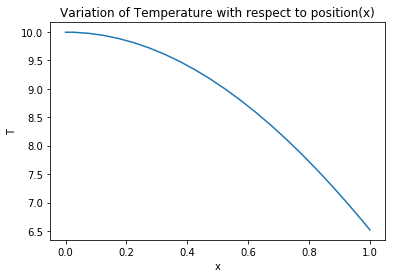

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T32CNall = T
T32CN = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 32 time steps

In [60]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar32 = sum (difference/(ncv+2))
t32 = dt

## For 16 time steps

In [61]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 16
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535
omega=0.5
# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = CrankNicolsonModel(grid, k, T, Told, omega, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.62910625
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 0.17018876606876132; Avg. Resid. = 0.1499682591528738
Iteration = 2; Max. Resid. = 0.009790048263433881; Avg. Resid. = 0.008619084165729318
Iteration = 3; Max. Resid. = 0.0005629877660671134; Avg. Resid. = 0.0004939016114639428
Iteration = 4; Max. Resid. = 9.92303154616625e-05; Avg. Resid. = 3.7608727757398876e-05
Iteration = 5; Max. Resid. = 5.71152254311702e-05; Avg. Resid. = 6.996457911900844e-06
Iteration = 6; Max. Resid. = 2.8202215311745604e-05; Avg. Resid. = 2.812590197509568e-06
Iteration = 7; Max. Resid. = 1.3729264829676069e-05; Avg. Resid. = 1.3768174309758408e-06
Iteration = 8; Max. Resid. = 6.683993433176383e-06; Avg. Resid. = 6.761357381535049e-07
Iteration = 9; Max. Resid. = 3.258583192167208e-06; Avg. Resid. = 3.3163790547074967e-07
Iteration = 10; Max. Resid. = 1.5906923165331932e-06; Avg. Resid. = 1.6260478192808846e-07
Iterati

Iteration = 1; Max. Resid. = 0.03570160374318676; Avg. Resid. = 0.03146713206650211
Iteration = 2; Max. Resid. = 0.0020526847157604777; Avg. Resid. = 0.0018089920673607374
Iteration = 3; Max. Resid. = 0.00016436916343159913; Avg. Resid. = 0.00010664735509689771
Iteration = 4; Max. Resid. = 4.8394861077494244e-05; Avg. Resid. = 1.0718303946904983e-05
Iteration = 5; Max. Resid. = 2.5908353116277372e-05; Avg. Resid. = 3.116878840006554e-06
Iteration = 6; Max. Resid. = 1.2923869459779969e-05; Avg. Resid. = 1.4732945838230592e-06
Iteration = 7; Max. Resid. = 6.397010203884612e-06; Avg. Resid. = 7.272720481205086e-07
Iteration = 8; Max. Resid. = 3.1637445591092828e-06; Avg. Resid. = 3.599698998740797e-07
Iteration = 9; Max. Resid. = 1.5646335730368222e-06; Avg. Resid. = 1.7816481219512514e-07
Iteration = 10; Max. Resid. = 7.738385353062149e-07; Avg. Resid. = 8.817829361129625e-08
Timestep = 13; Time = 2.9119874999999995
Iteration = 0; Max. Resid. = 0.5451403154427935; Avg. Resid. = 0.4804920

[9.97191001 9.97191001 9.9534626  9.9166019  9.8613961  9.7879473
 9.69639137 9.58689764 9.45966861 9.3149396  9.15297831 8.97408436
 8.77858878 8.56685348 8.33927064 8.09626192 7.83827755 7.56579473
 7.27931506 6.97936    6.66646248 6.50386584]


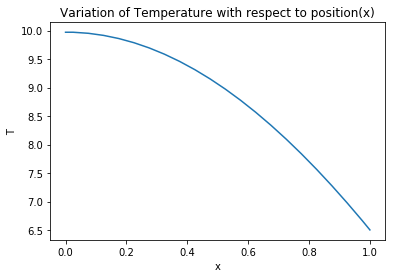

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T16CNall = T
T16CN = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 16 time steps

In [63]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar16 = sum (difference/(ncv+2))
t16 = dt

## For 8 time steps

In [64]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 8
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535
omega=0.5
# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = CrankNicolsonModel(grid, k, T, Told, omega, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 0.8047124999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 0.305259082433579; Avg. Resid. = 0.26900940035458065
Iteration = 2; Max. Resid. = 0.03149327150614978; Avg. Resid. = 0.027740961689138366
Iteration = 3; Max. Resid. = 0.003250830104978064; Avg. Resid. = 0.0028591751596706017
Iteration = 4; Max. Resid. = 0.0003359078702138696; Avg. Resid. = 0.0002939962142118779
Iteration = 5; Max. Resid. = 4.079937080914142e-05; Avg. Resid. = 3.399954708656061e-05
Iteration = 6; Max. Resid. = 2.887360432035635e-05; Avg. Resid. = 5.790917756998137e-06
Iteration = 7; Max. Resid. = 1.5068200893697536e-05; Avg. Resid. = 1.723166545153365e-06
Iteration = 8; Max. Resid. = 7.4878217724005935e-06; Avg. Resid. = 7.354487174593416e-07
Iteration = 9; Max. Resid. = 3.6876346074521393e-06; Avg. Resid. = 3.602779498845798e-07
Iteration = 10; Max. Resid. = 1.8140526043541882e-06; Avg. Resid. = 1.7889431912498922e-07
It

[9.88365678 9.88365678 9.86537243 9.8288376  9.77411994 9.70132076
 9.61057488 9.50205034 9.37594809 9.23250162 9.07197649 8.89466979
 8.70090957 8.49105407 8.26549096 8.02463639 7.76893391 7.49885321
 7.21488867 6.9175576  6.60739815 6.4462421 ]


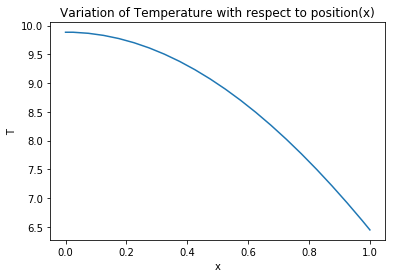

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T8CNall = T
T8CN = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 8 time steps

In [66]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar8 = sum (difference/(ncv+2))
t8 = dt

## For 4 time steps

In [67]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 4
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535
omega=0.5
# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = CrankNicolsonModel(grid, k, T, Told, omega, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))

Timestep = 0; Time = 1.1559249999999999
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 0.506098401709868; Avg. Resid. = 0.446023187780373
Iteration = 2; Max. Resid. = 0.08655631955971543; Avg. Resid. = 0.0762677076856985
Iteration = 3; Max. Resid. = 0.014805982472955392; Avg. Resid. = 0.0130401239470331
Iteration = 4; Max. Resid. = 0.0025336276860388196; Avg. Resid. = 0.0022289852616745433
Iteration = 5; Max. Resid. = 0.000433918249622689; Avg. Resid. = 0.000380728647985884
Iteration = 6; Max. Resid. = 7.443880889690391e-05; Avg. Resid. = 6.490078202447958e-05
Iteration = 7; Max. Resid. = 1.2808589669788262e-05; Avg. Resid. = 1.1807650602468911e-05
Iteration = 8; Max. Resid. = 6.708825090129267e-06; Avg. Resid. = 2.5066265601836334e-06
Iteration = 9; Max. Resid. = 3.7810598108034554e-06; Avg. Resid. = 6.704842798965771e-07
Iteration = 10; Max. Resid. = 1.948599953172092e-06; Avg. Resid. = 2.3465497855923445e-07
Iteration =

[9.52484557 9.52484557 9.50722616 9.47201991 9.41929185 9.34913941
 9.26169219 9.1571117  9.0355911  8.89735478 8.74265794 8.57178612
 8.38505459 8.18280777 7.96541857 7.73328761 7.48684245 7.22653674
 6.95284931 6.66628317 6.36736452 6.21206295]


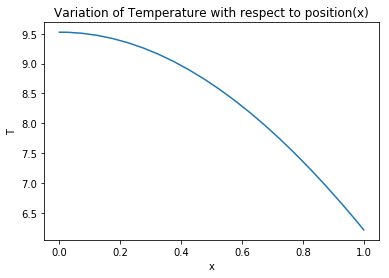

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, T)
print(T)
T4CNall = T
T4CN = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 4 time steps

In [69]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar4 = sum (difference/(ncv+2))
t4 = dt

## For 2 time steps

In [70]:
import numpy as np
from numpy.linalg import norm

# Define the grid
lx = 1.0
ly = 1.0
lz = 1.0
ncv = 20
grid = Grid(lx, ly, lz, ncv)

# Set the timestep information
nTime = 2
dt = (3.2632-0.4535)/nTime
time = 0.4535

# Set the maximum number of iterations and convergence criterion
maxIter = 100
converged = 1e-6

# Define thermophysical properties
# All of these are assumed 1 for simplicity
rho = 1
cp = 1
k = 1

# Define convection parameters
h = 1
To = 0

# Define the coefficients
coeffs = ScalarCoeffs(grid.ncv)

# Constants and Initial conditions
C1   = 1.1191
Ti   = 100
Tinf = 0
zeta = 0.8603
alpha= 1
t1   = 0.4535
omega=0.5
# Initialize field variable arrays
T = Tinf + (Ti - Tinf)*C1*np.exp(-1*zeta**2*(alpha*t1/lx*lx))*np.cos(zeta*grid.xP/lx)

# Define boundary conditions
west_bc = NeumannBc(T, grid, 0, BoundaryLocation.WEST)
east_bc = RobinBc(T, Tinf, grid, h, k, BoundaryLocation.EAST)

# Apply boundary conditions
west_bc.apply()
east_bc.apply()

# Create list to store the solutions at each timestep
T_solns = [np.copy(T)]

# Define the transient model
Told = np.copy(T)
transient = CrankNicolsonModel(grid, k, T, Told, omega, rho, cp, dt)

# Define the diffusion model
diffusion = DiffusionModel(grid, T, k, rho, cp, dt, west_bc, east_bc)

# Define the surface convection model
surfaceConvection = SurfaceConvectionModel(grid, T, h, To)

# Loop through all timesteps
for tStep in range(nTime):
    # Update the time information
    time+=dt
    
    # Print the timestep information
    print("Timestep = {}; Time = {}".format(tStep, time))
    
    # Store the "old" temperature field
    Told[:] = T[:]
    
    # Iterate until the solution is converged
    for i in range(maxIter):
        # Zero the coefficients and add each influence
        coeffs.zero()
        coeffs = diffusion.add(coeffs)
        coeffs = transient.add(coeffs)
        # Compute residual and check for convergence 
        maxResid = norm(coeffs.rP, np.inf)
        avgResid = np.mean(np.absolute(coeffs.rP))
        print("Iteration = {}; Max. Resid. = {}; Avg. Resid. = {}".format(i, maxResid, avgResid))
        if maxResid < converged:
            break
    
        # Solve the sparse matrix system
        dT = solve(coeffs)
    
        # Update the solution and boundary conditions
        T[1:-1] += dT
        west_bc.apply()
        east_bc.apply()
    
    # Store the solution
    T_solns.append(np.copy(T))
   

Timestep = 0; Time = 1.85835
Iteration = 0; Max. Resid. = 2.9593993706063766; Avg. Resid. = 2.6083070032713302
Iteration = 1; Max. Resid. = 0.7542214018342649; Avg. Resid. = 0.664716241660392
Iteration = 2; Max. Resid. = 0.19222246675482035; Avg. Resid. = 0.16939856484714683
Iteration = 3; Max. Resid. = 0.048992208840670126; Avg. Resid. = 0.043169331279983104
Iteration = 4; Max. Resid. = 0.012487646303241062; Avg. Resid. = 0.011000845807405402
Iteration = 5; Max. Resid. = 0.003183372428582798; Avg. Resid. = 0.002803165480908254
Iteration = 6; Max. Resid. = 0.0008116825663924132; Avg. Resid. = 0.0007141972129600105
Iteration = 7; Max. Resid. = 0.00020703425619728044; Avg. Resid. = 0.0001819225677221925
Iteration = 8; Max. Resid. = 5.2840206321125294e-05; Avg. Resid. = 4.631943363446745e-05
Iteration = 9; Max. Resid. = 1.3499951978745983e-05; Avg. Resid. = 1.178352398286675e-05
Iteration = 10; Max. Resid. = 3.454879781594755e-06; Avg. Resid. = 2.992896959619351e-06
Iteration = 11; Max. R

[7.98606208 7.98606208 7.9712864  7.94176235 7.89754445 7.8387144
 7.76538087 7.67767932 7.57577174 7.45984638 7.33011737 7.18682429
 7.03023182 6.86062914 6.67832946 6.48366943 6.27700848 6.05872819
 5.82923154 5.58894219 5.33830369 5.20810116]


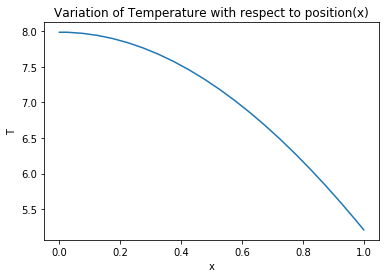

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(grid.xP, T)

print(T)
T2CNall = T
T2CN = max(T)
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.show()

## Calculation of Error for 2 time steps

In [72]:
import numpy as np

difference = np.absolute(np.array(T) - np.array(Tana))
ebar2 = sum (difference/(ncv+2))
t2 = dt


## Calculation of P

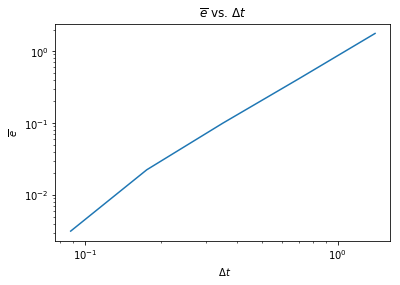

2.247264102311792 -0.08472746901900396


In [73]:
import numpy as np
ebarCN = [ebar2, ebar4, ebar8, ebar16, ebar32]
t    = [t2, t4, t8, t16, t32]
plt.loglog(t, ebarCN)
plt.title("$\overline{e}$ vs. $\Delta t$ ")
plt.xlabel(" $\Delta t$")
plt.ylabel("$\overline{e}$")
plt.show()
y = np.log(ebarCN)
x = np.log(t)
A = np.vstack([x, np.ones(len(x))]).T
p, c = np.linalg.lstsq(A, y,rcond=None)[0]
print(p, c)


It appears that the order of accuracy for Crank-Nicholson scheme is 2.247. It can be considered as an acceptable value as it is a second order scheme.

## Plot of T(0,t2) versus the number of timesteps

Text(0,0.5,'T')

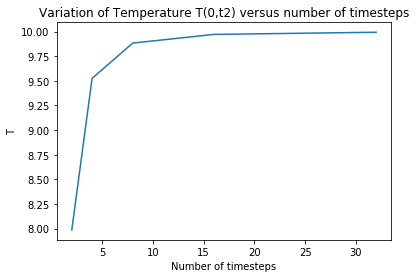

In [74]:
import matplotlib.pyplot as plt
TCN    = [T2CN, T4CN, T8CN, T16CN, T32CN]
timesteps = [2, 4, 8, 16, 32]
plt.plot(timesteps, TCN)
plt.title('Variation of Temperature T(0,t2) versus number of timesteps')
plt.xlabel("Number of timesteps")
plt.ylabel("T")

# <center><font color=|blue|>Summary of all results from the 3 Schemes </font></center>

## Comparative Variation of Temperature T(0,t2) versus number of timesteps for 3 Schemes

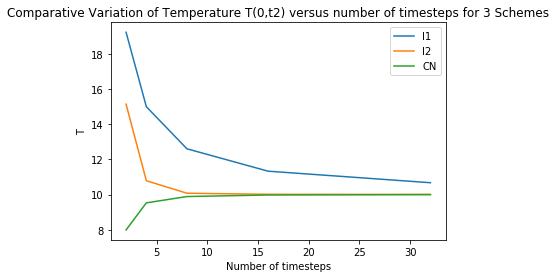

In [75]:
import matplotlib.pyplot as plt
timesteps = [2, 4, 8, 16, 32]
plt.plot(timesteps, TI1, '-',label='I1')
plt.plot(timesteps, TI2, '-',label='I2')
plt.plot(timesteps, TCN, '-',label='CN')
plt.title('Comparative Variation of Temperature T(0,t2) versus number of timesteps for 3 Schemes')
plt.xlabel("Number of timesteps")
plt.ylabel("T")
plt.legend()
plt.show()

- This figure shows how the temperature varies with the increase in number of timesteps. 
- For the fully implicit schemes (both fist and second order), the temperature T (0, t2) remains greater than the exact Texact (0, t2) = 10 degree Celsius during the smaller timesteps and decreases as the number of timesteps increases whereas for Crank-Nicolson the temperature T (0, t2)  starts from a smaller value than the exact Texact (0, t2) = 10 degree Celsius during the smaller timesteps and rises with the number of timesteps.
- There takes place a significant change in temperature during smaller timesteps (e.g., timesteps 2 to 8) in case of fully implicit scheme (both fist and second order) compared to Crank-Nicolson scheme. 
- Both the second order fully implicit and Crank-Nicolson scheme come closer to exact solution much earlier compared to the first order scheme. It shows the efficiency of second order schemes.
- For both the second order schemes (second order fully implicit and Crank-Nicolson), after timestep 8 the change in temperature with the increase in timestep is very small that is the solution becomes almost stable and close to Texact (0, t2) = 10 degree Celsius. After timestep 16, the lines from both schemes overlaps each other. Hence, increase of timesteps beyond 32 will increase the computation as well as computational time without significantly reducing the error.

## Comparative graph of $\overline{e}$ vs. $\Delta t$ for 3 Schemes

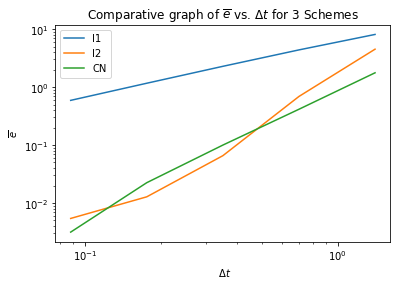

In [76]:
import numpy as np
plt.loglog(t, ebarI1, '-', label='I1')
plt.loglog(t, ebarI2, '-', label='I2')
plt.loglog(t, ebarCN, '-', label='CN')
plt.title("Comparative graph of $\overline{e}$ vs. $\Delta t$ for 3 Schemes")
plt.xlabel(" $\Delta t$")
plt.ylabel("$\overline{e}$")
plt.legend()
plt.show()

- This figure displays how the error varies with the size of timestep on log-log graph. 
- For fully implicit first order scheme it is a straight line unlike the second order fully implicit scheme and Crank-Nicolson scheme.
- For all the three cases, the error increases with the increase in the size of timestep. However, this rate of increase in error with respect to the size of timestep is more significant in case of Crank-Nicolson scheme and second order fully implicit scheme compared to first order fully implicit scheme. 
- But the final error resulting from first order fully implicit scheme is greater than both Crank-Nicolson scheme and second order fully implicit scheme which is quite reasonable.
- The lowest error for this analysis is achieved by Crank-Nicolson scheme. 
- For, second order fully implicit scheme, the slope of the corresponding line increases at two steps with the increase in the size of timestep and decrease very slightly during higher sizes of timesteps.
- Slope of the line corresponding to Crank-Nicolson scheme faces a little drop during the smaller size of timesteps and then continues in the same way as the size of timestep goes higher. 


## Comparative graph of Variation of Temperature with respect to position(x) for 3 Schemes

## Comparative graph of Variation of Temperature with respect to position(x) for Fully Implicit First-Order Time Discretization Scheme

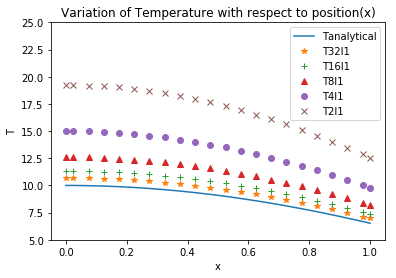

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, Tana,     '-', label='Tanalytical')
plt.plot(grid.xP, T32I1all, '*', label='T32I1')
plt.plot(grid.xP, T16I1all, '+', label='T16I1')
plt.plot(grid.xP, T8I1all,  '^', label='T8I1')
plt.plot(grid.xP, T4I1all,  'o', label='T4I1')
plt.plot(grid.xP, T2I1all,  'x', label='T2I1')
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.ylim(5,25)
plt.legend()
plt.show()

- This figure exhibits the temperature profile for each number of timesteps and compares them to analytical temperature profile for fully implicit first-order time discretization scheme. 
- It clearly shows that the temperature profile for 32 timesteps is closest to the analytical temperature profile and as the number of timesteps decrease the deviation of temperature profile from analytical temperature profile increases that is the error increases. Thus, the most significant error is involved with the temperature profile corresponding to 2 timesteps.

## Comparative graph of Variation of Temperature with respect to position(x) for Fully Implicit Second-Order Time Discretization Scheme

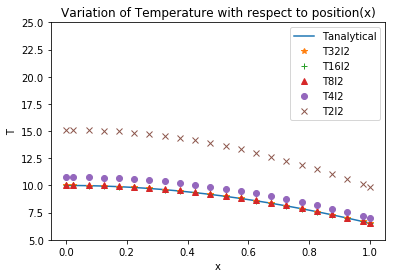

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, Tana,     '-', label='Tanalytical')
plt.plot(grid.xP, T32I2all, '*', label='T32I2')
plt.plot(grid.xP, T16I2all, '+', label='T16I2')
plt.plot(grid.xP, T8I2all,  '^', label='T8I2')
plt.plot(grid.xP, T4I2all,  'o', label='T4I2')
plt.plot(grid.xP, T2I2all,  'x', label='T2I2')
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.ylim(5,25)
plt.legend()
plt.show()

## Above graph(partial) zoomed in to show presence of all timesteps of Fully Implicit Second Order Scheme

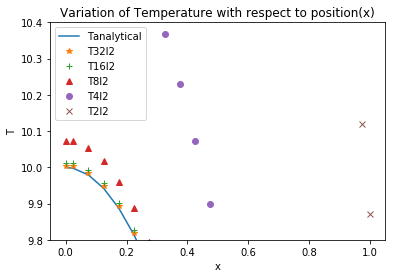

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, Tana,     '-', label='Tanalytical')
plt.plot(grid.xP, T32I2all, '*', label='T32I2')
plt.plot(grid.xP, T16I2all, '+', label='T16I2')
plt.plot(grid.xP, T8I2all,  '^', label='T8I2')
plt.plot(grid.xP, T4I2all,  'o', label='T4I2')
plt.plot(grid.xP, T2I2all,  'x', label='T2I2')
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.ylim(9.8,10.4)
plt.legend()
plt.show()

- These figures represent the temperature profile for each number of timesteps and compares them to analytical temperature profile for fully implicit second-order time discretization scheme. 
- According to this scheme, the computational results are so close to the analytical results that the lines corresponding to timestep 32, 16, 8 are overlapping with the analytical result. Even the results obtained with 4 timesteps are also very close to the analytical result.
- The fact that the computational results of this scheme are very close to analytical result, shows the accuracy of this scheme.
- On the other hand, the overlapping of results corresponding to timestep 32, 16, 8 with analytical result and very closeness of the results of 4 timestep to analytical results, reveals the efficiency of this scheme.
- It is anticipated that, consideration of old as well as older values of temperature along with the current value are liable for such performance of second order scheme.
- The difficulty for finding the older temperature values for the first timestep was removed by applying the first order fully implicit scheme for the first timestep.  
- To make the presence of the results of all timesteps, visible, the figure is zoomed in partially.

## Comparative graph of Variation of Temperature with respect to position(x) for Crank-Nicolson Time Discretization Scheme

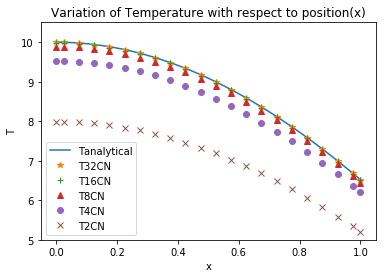

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, Tana,     '-', label='Tanalytical')
plt.plot(grid.xP, T32CNall, '*', label='T32CN')
plt.plot(grid.xP, T16CNall, '+', label='T16CN')
plt.plot(grid.xP, T8CNall,  '^', label='T8CN')
plt.plot(grid.xP, T4CNall,  'o', label='T4CN')
plt.plot(grid.xP, T2CNall,  'x', label='T2CN')
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.ylim(5,10.5)
plt.legend()
plt.show()

- The temperature profile for each number of timesteps and comparison of them to analytical temperature profile for Crank-Nicolson time discretization scheme is presented in this figure.
- Like the second order fully implicit scheme, for this scheme also the results corresponding to timesteps 32, 16, 8 are almost overlapping with the analytical result.
- The results corresponding to 4 timesteps are also closer to analytical result.
- Unlike the second order fully implicit scheme, for this scheme the deviated temperatures are lower than the analytical results.
- From computational perspective, even though this scheme deals the transient term following the same way of first order fully implicit scheme (considering temperature at two-time levels), however, it does additional correction in flux terms which makes it different from the first order fully implicit scheme. This can also be anticipated as a reason of the improved performance of this scheme.
- Like the first and second order fully implicit scheme, in this case also the results corresponding to 2 timesteps are farthest from the analytical result.

## Comparative graph of Variation of Temperature with respect to position(x) for 32nd timestep of all Schemes

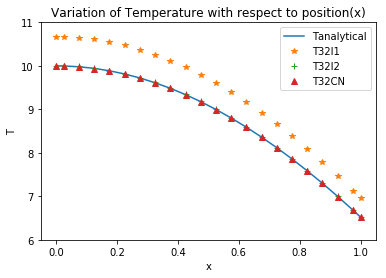

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, Tana,     '-', label='Tanalytical')
plt.plot(grid.xP, T32I1all, '*', label='T32I1')
plt.plot(grid.xP, T32I2all, '+', label='T32I2')
plt.plot(grid.xP, T32CNall,  '^', label='T32CN')
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.ylim(6,11)
plt.legend()
plt.show()

## Above graph(partial) zoomed in to show presence of Fully Implicit Second Order Scheme

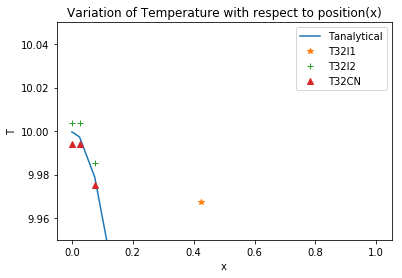

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(grid.xP, Tana,     '-', label='Tanalytical')
plt.plot(grid.xP, T32I1all, '*', label='T32I1')
plt.plot(grid.xP, T32I2all, '+', label='T32I2')
plt.plot(grid.xP, T32CNall,  '^', label='T32CN')
plt.title('Variation of Temperature with respect to position(x)')
plt.xlabel("x")
plt.ylabel("T")
plt.ylim(9.95,10.05)
plt.legend()
plt.show()

- These figures represent the temperature profile for each of the time discretization schemes along with their comparison with analytical result.
- These are the results from the 32nd timestep of 32 timesteps for all the schemes. 
- It is evident that the results of second order fully implicit scheme and Crank-Nicolson time discretization scheme are so close to the analytical results that they cannot be differentiated from each other in the first graph. To make them visible, the graph is partially zoomed in the second figure.
- It is obvious that both the second order schemes should give more accurate result from the first order scheme and this is exactly what is reflected from these figures.